In [2]:
# Library imports

import os.path as op
import warnings

import numpy as np
import pandas as pd

from utilities import reduce_df_mem_usage, plot_meter, denoise

from matplotlib import pyplot as plt
import seaborn as sns

import matplotlib as mpl

In [3]:
#  Populate global namespace

%matplotlib inline

rand_seed = 1234
rand_state = np.random.RandomState(rand_seed)

warnings.simplefilter(action='ignore', category=FutureWarning)
PATH = '/home/dhren/Documents/000_flatiron/002_projects/006_1028_kaggle_ASHRAE/data'

FIGSIZE = (22, 20)

In [4]:
%%time

# Read data set

df_train = reduce_df_mem_usage(pd.read_csv(op.join(PATH, 'train.csv')))
df_train['timestamp'] = pd.to_datetime(df_train['timestamp'])
display(df_train.head().append(df_train.tail()))

building_id  meter  timestamp  meter_reading
0            0      0 2016-01-01            0.0
1            1      0 2016-01-01            0.0
2            2      0 2016-01-01            0.0
3            3      0 2016-01-01            0.0
4            4      0 2016-01-01            0.0

CPU times: user 8.18 s, sys: 417 ms, total: 8.6 s
Wall time: 6.36 s


In [5]:
%%time

# Apply proprietary denoise to the meter reading of each building/meter

group = ['building_id', 'meter']
target = 'meter_reading'

grp = df_train.groupby(group, sort = False)[[target]]
df_train[target + "_denoise"] = grp.transform(denoise)

/opt/miniconda3/envs/ml/lib/python3.7/site-packages/pandas/core/groupby/generic.py:627: RuntimeWarning: invalid value encountered in less
  lambda x: func(x, *args, **kwargs), axis=self.axis
/opt/miniconda3/envs/ml/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/miniconda3/envs/ml/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/opt/miniconda3/envs/ml/lib/python3.7/site-packages/pandas/core/groupby/generic.py:627: RuntimeWarning: invalid value encountered in less_equal
  lambda x: func(x, *args, **kwargs), axis=self.axis


CPU times: user 1min 38s, sys: 1.16 s, total: 1min 39s
Wall time: 29.3 s


/opt/miniconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less
  """


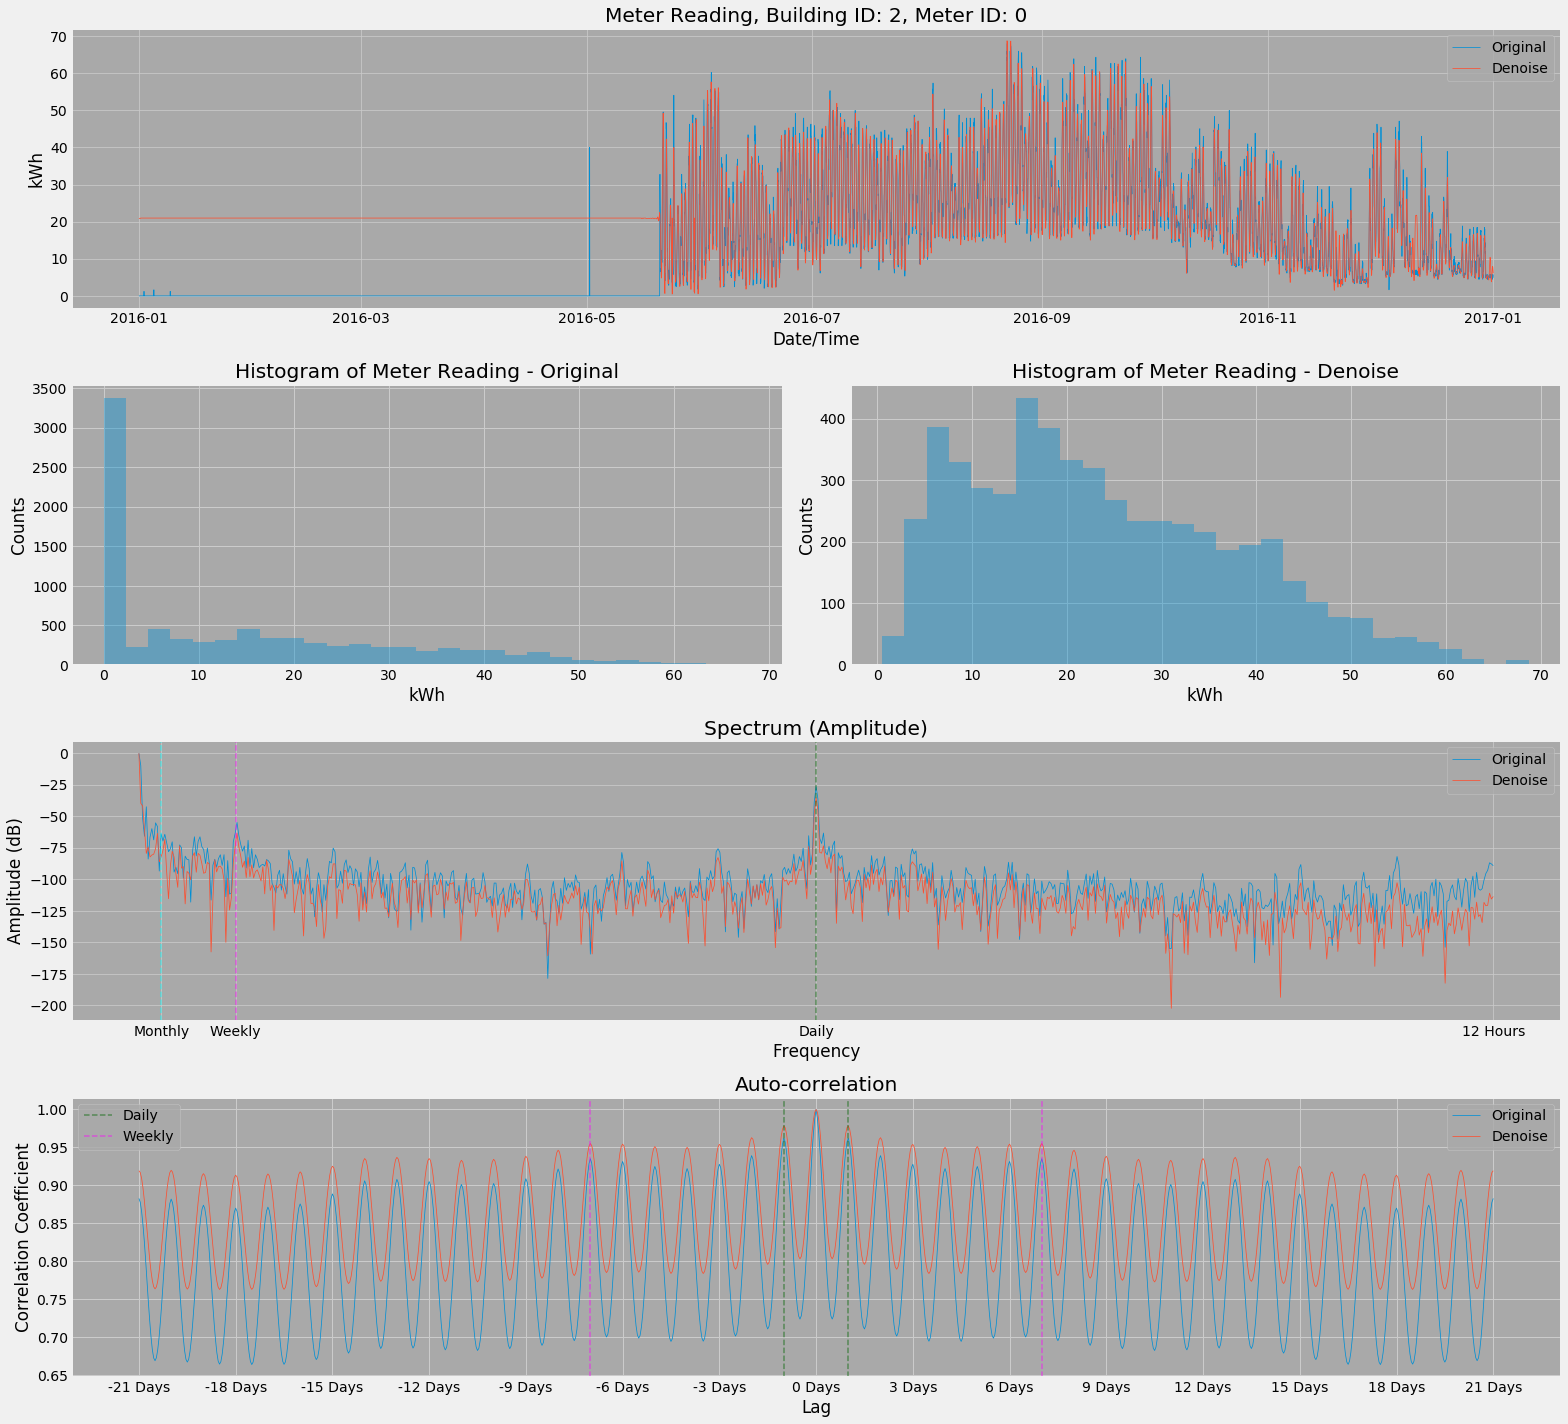

/opt/miniconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in less
  


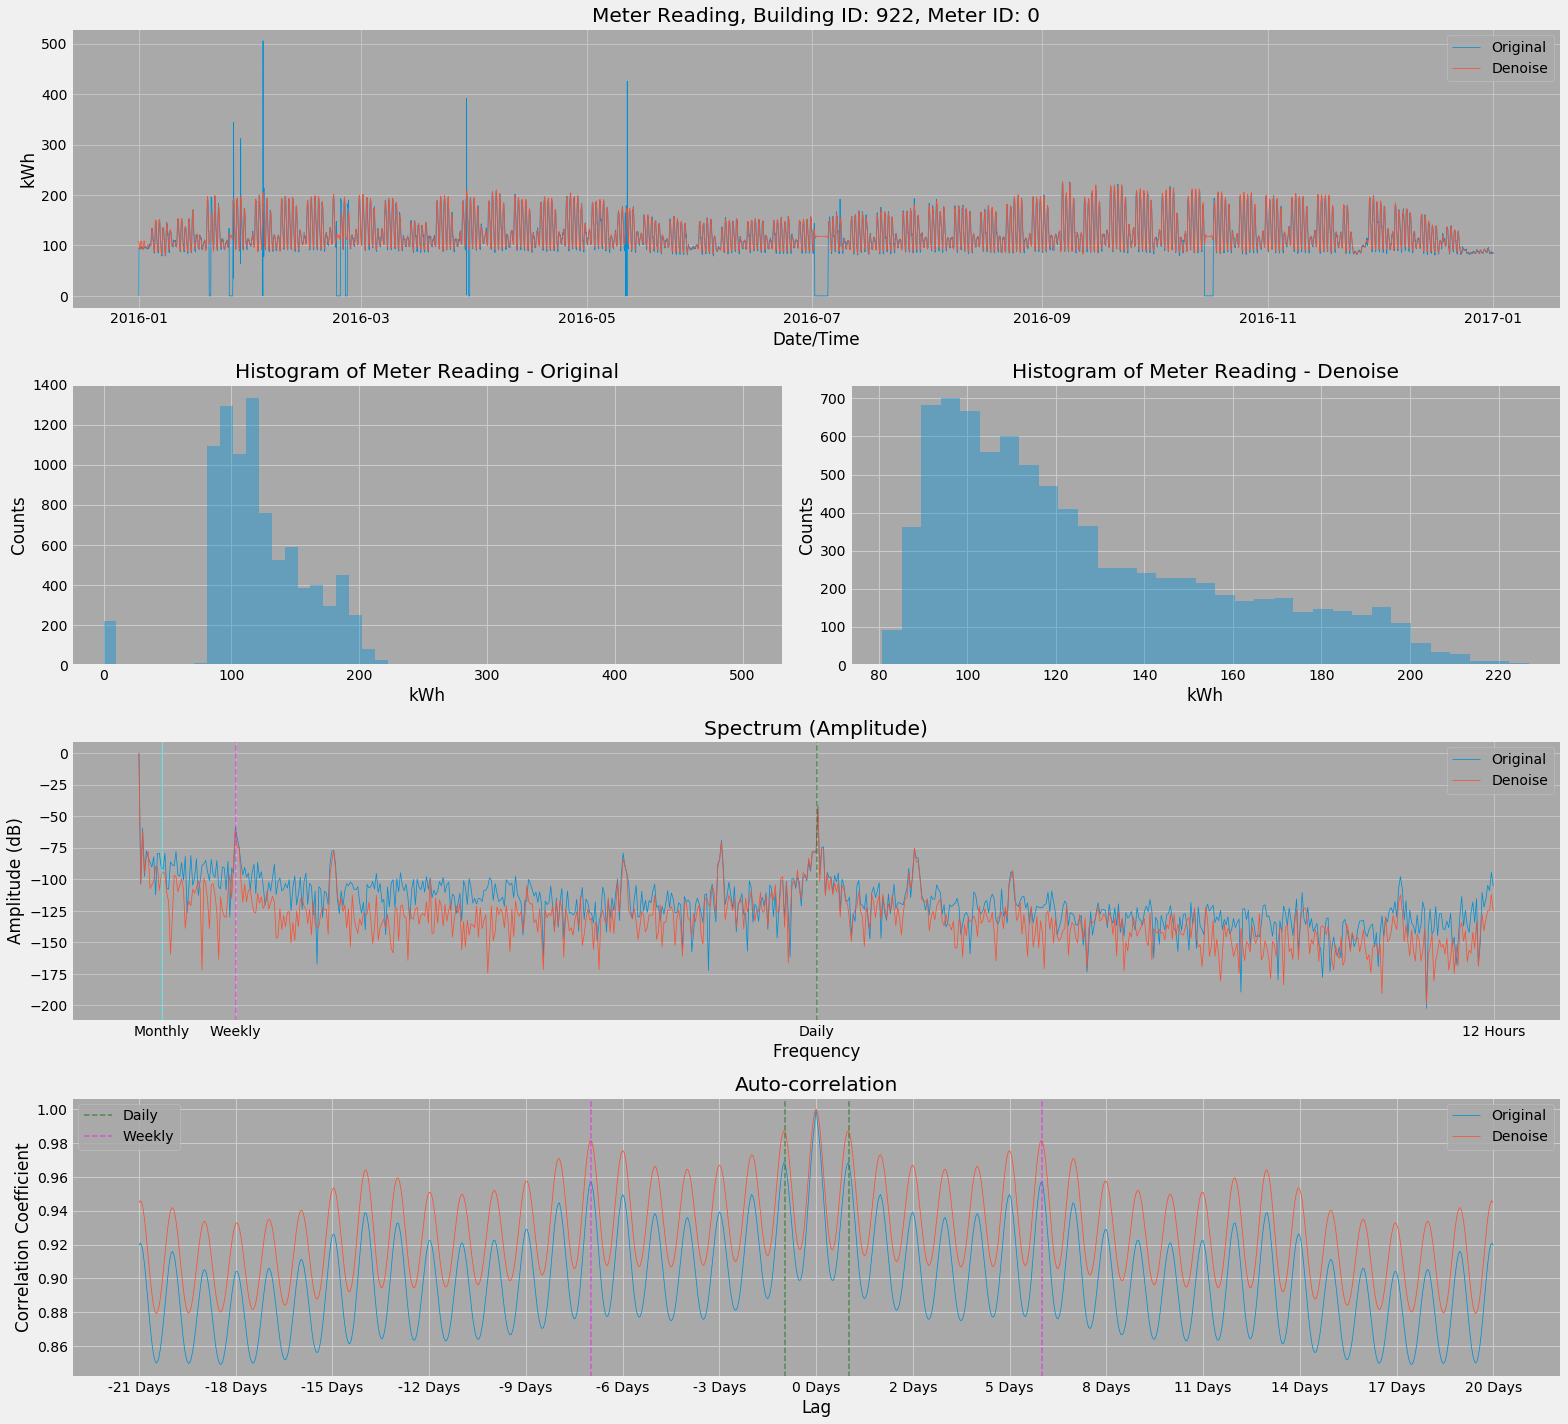

In [6]:
# Generate example Images

with plt.style.context('fivethirtyeight'):
    mpl.rcParams['axes.facecolor'] = 'darkgrey' 
    plot_meter(df_train, 2, 0, FIGSIZE, save = True)
    plot_meter(df_train, 922, 0, FIGSIZE, save = True)

/opt/miniconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in less
  import sys


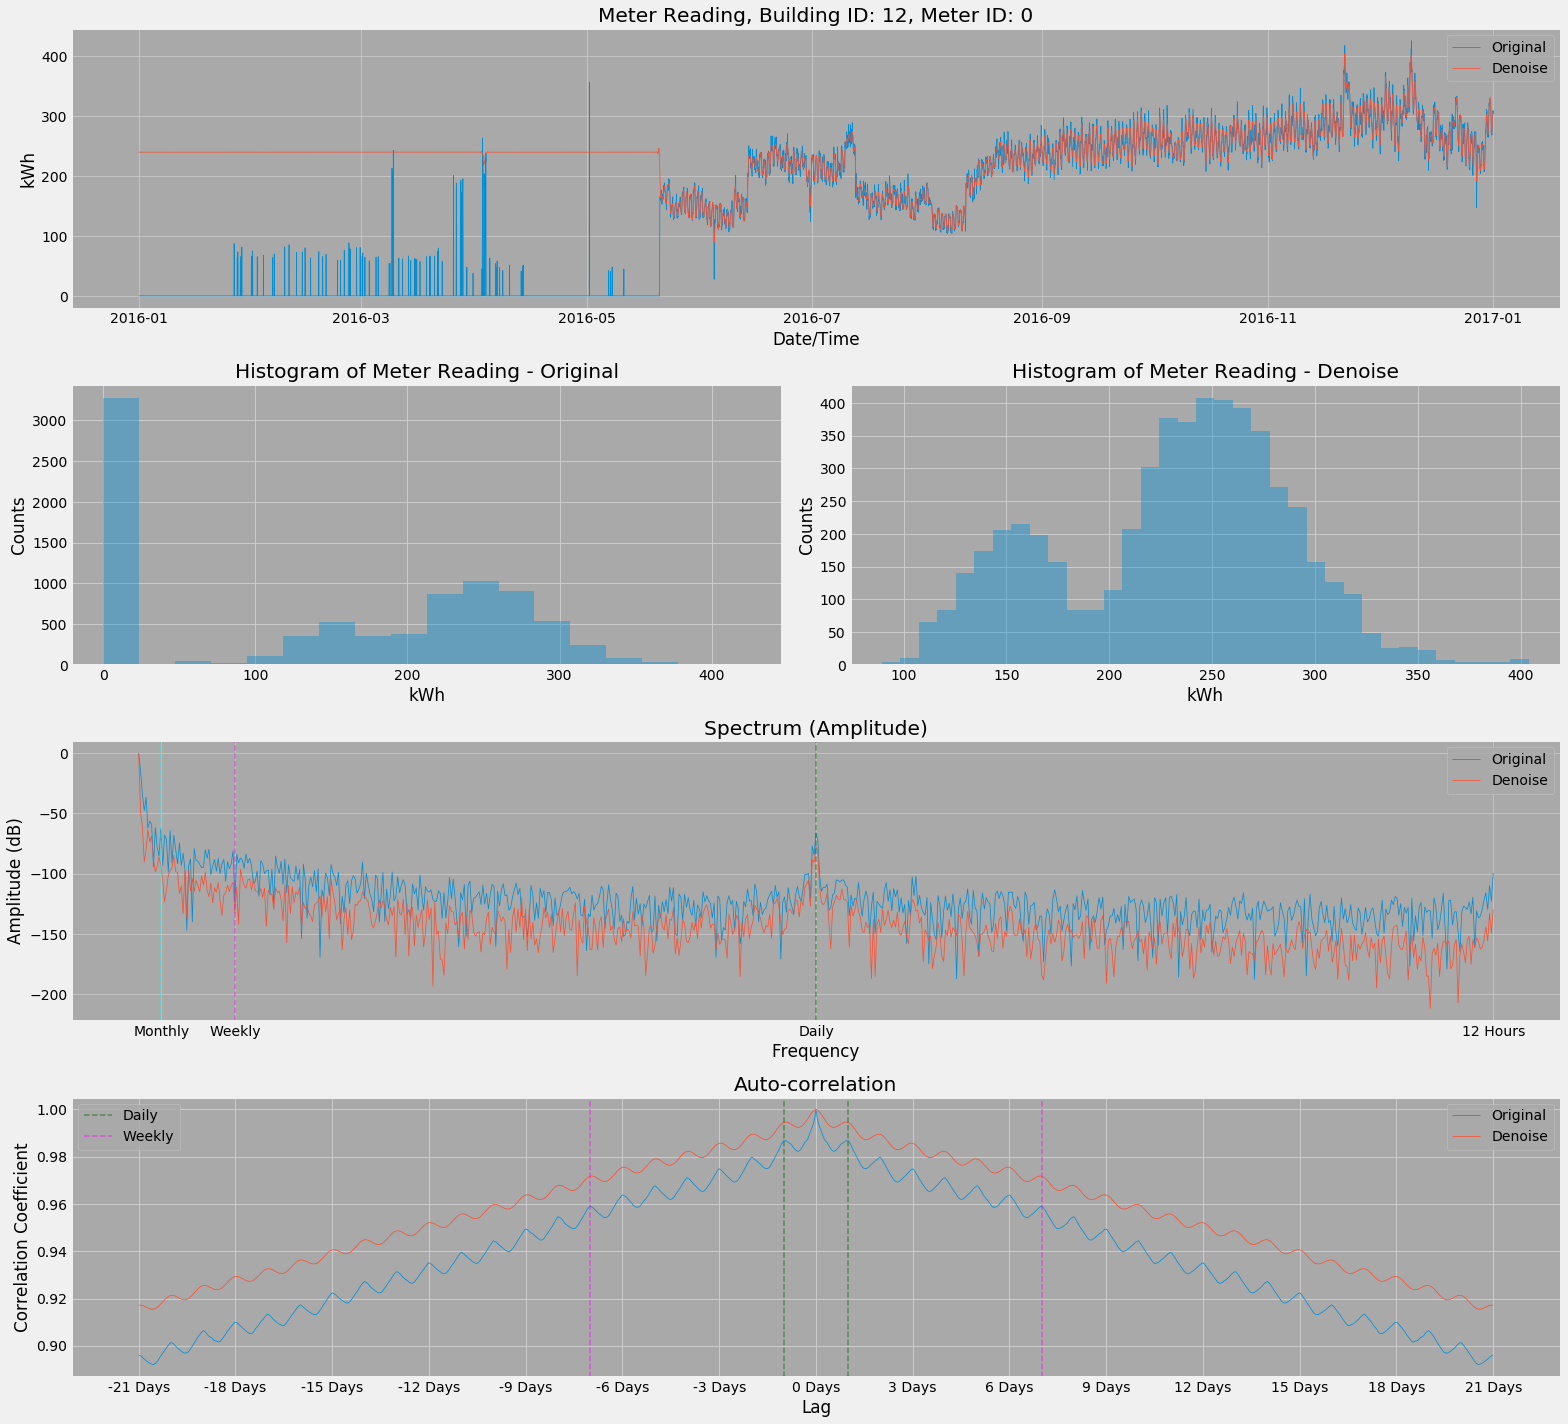

/opt/miniconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in less
  import sys


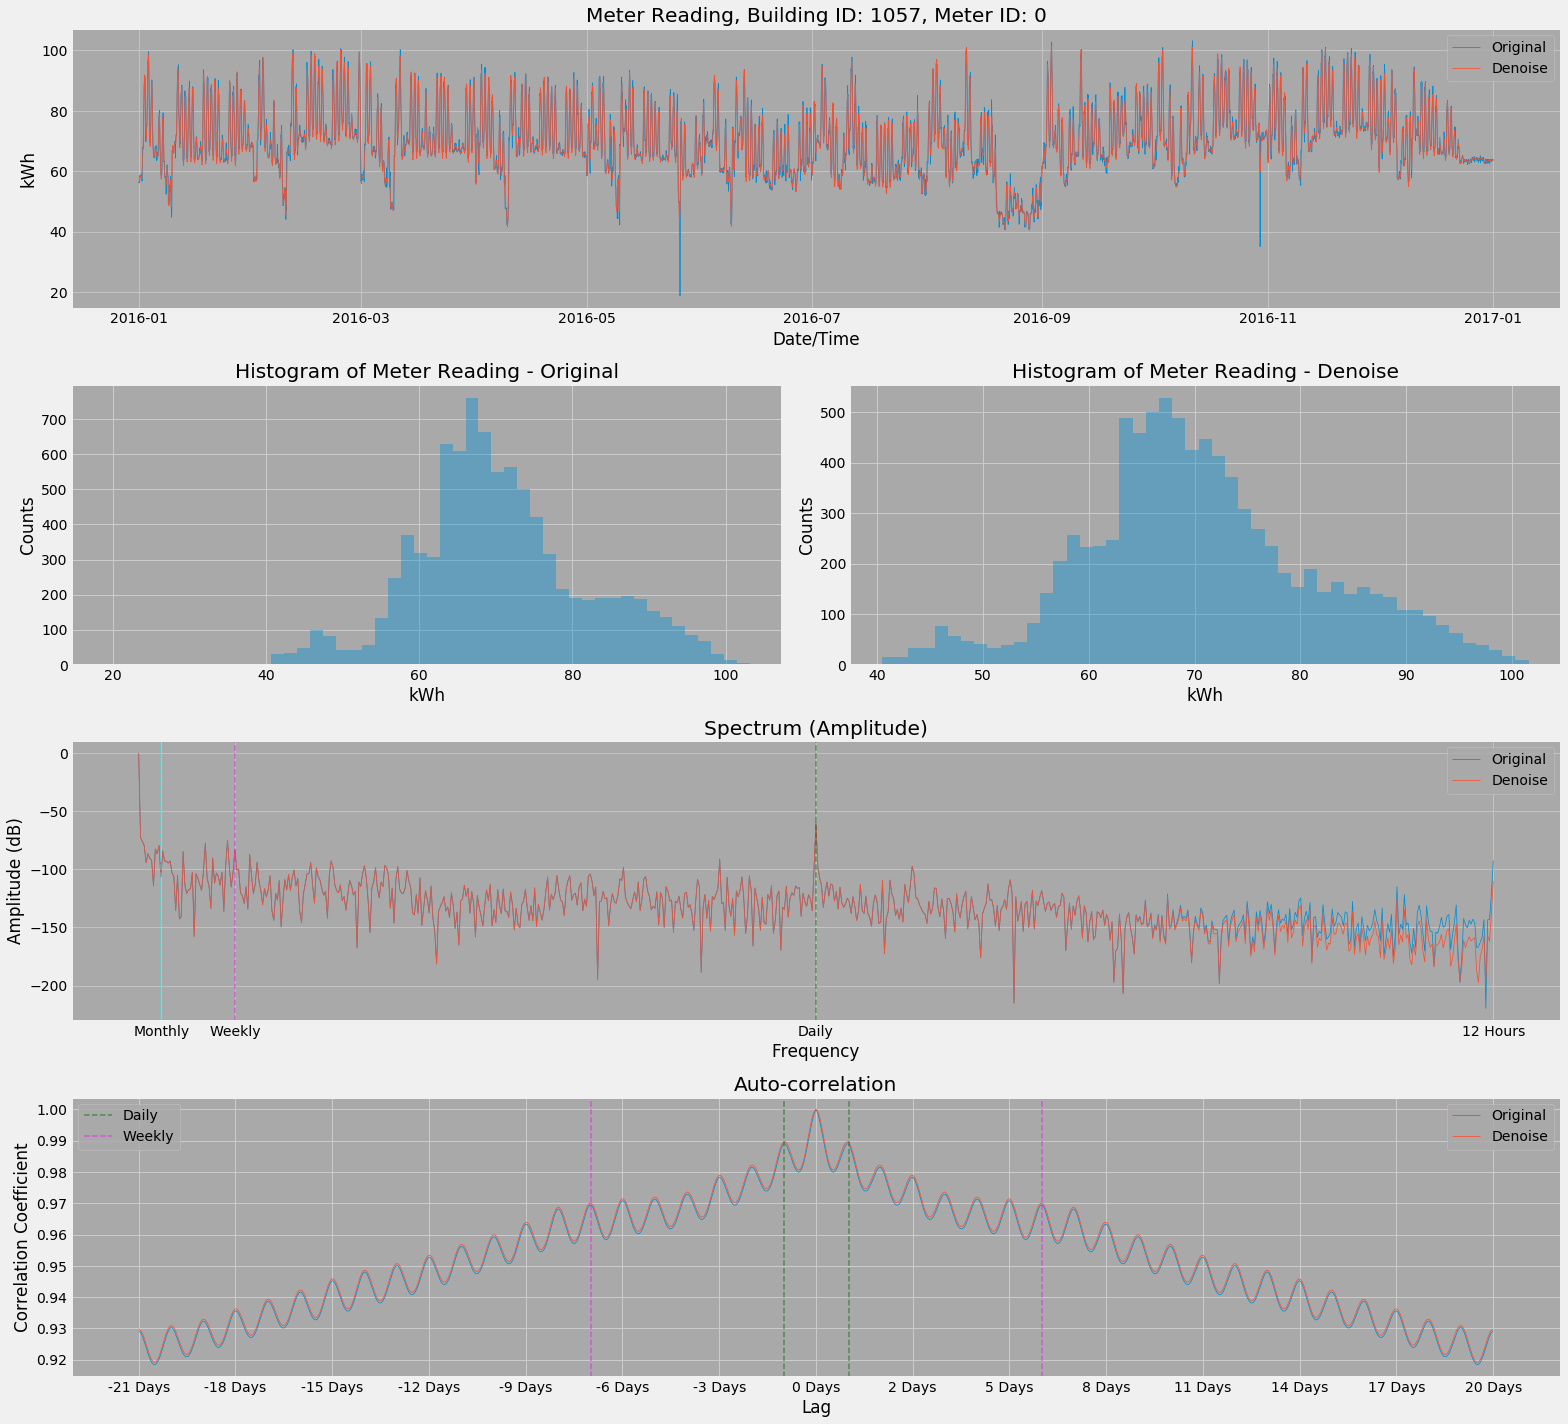

/opt/miniconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in less
  import sys


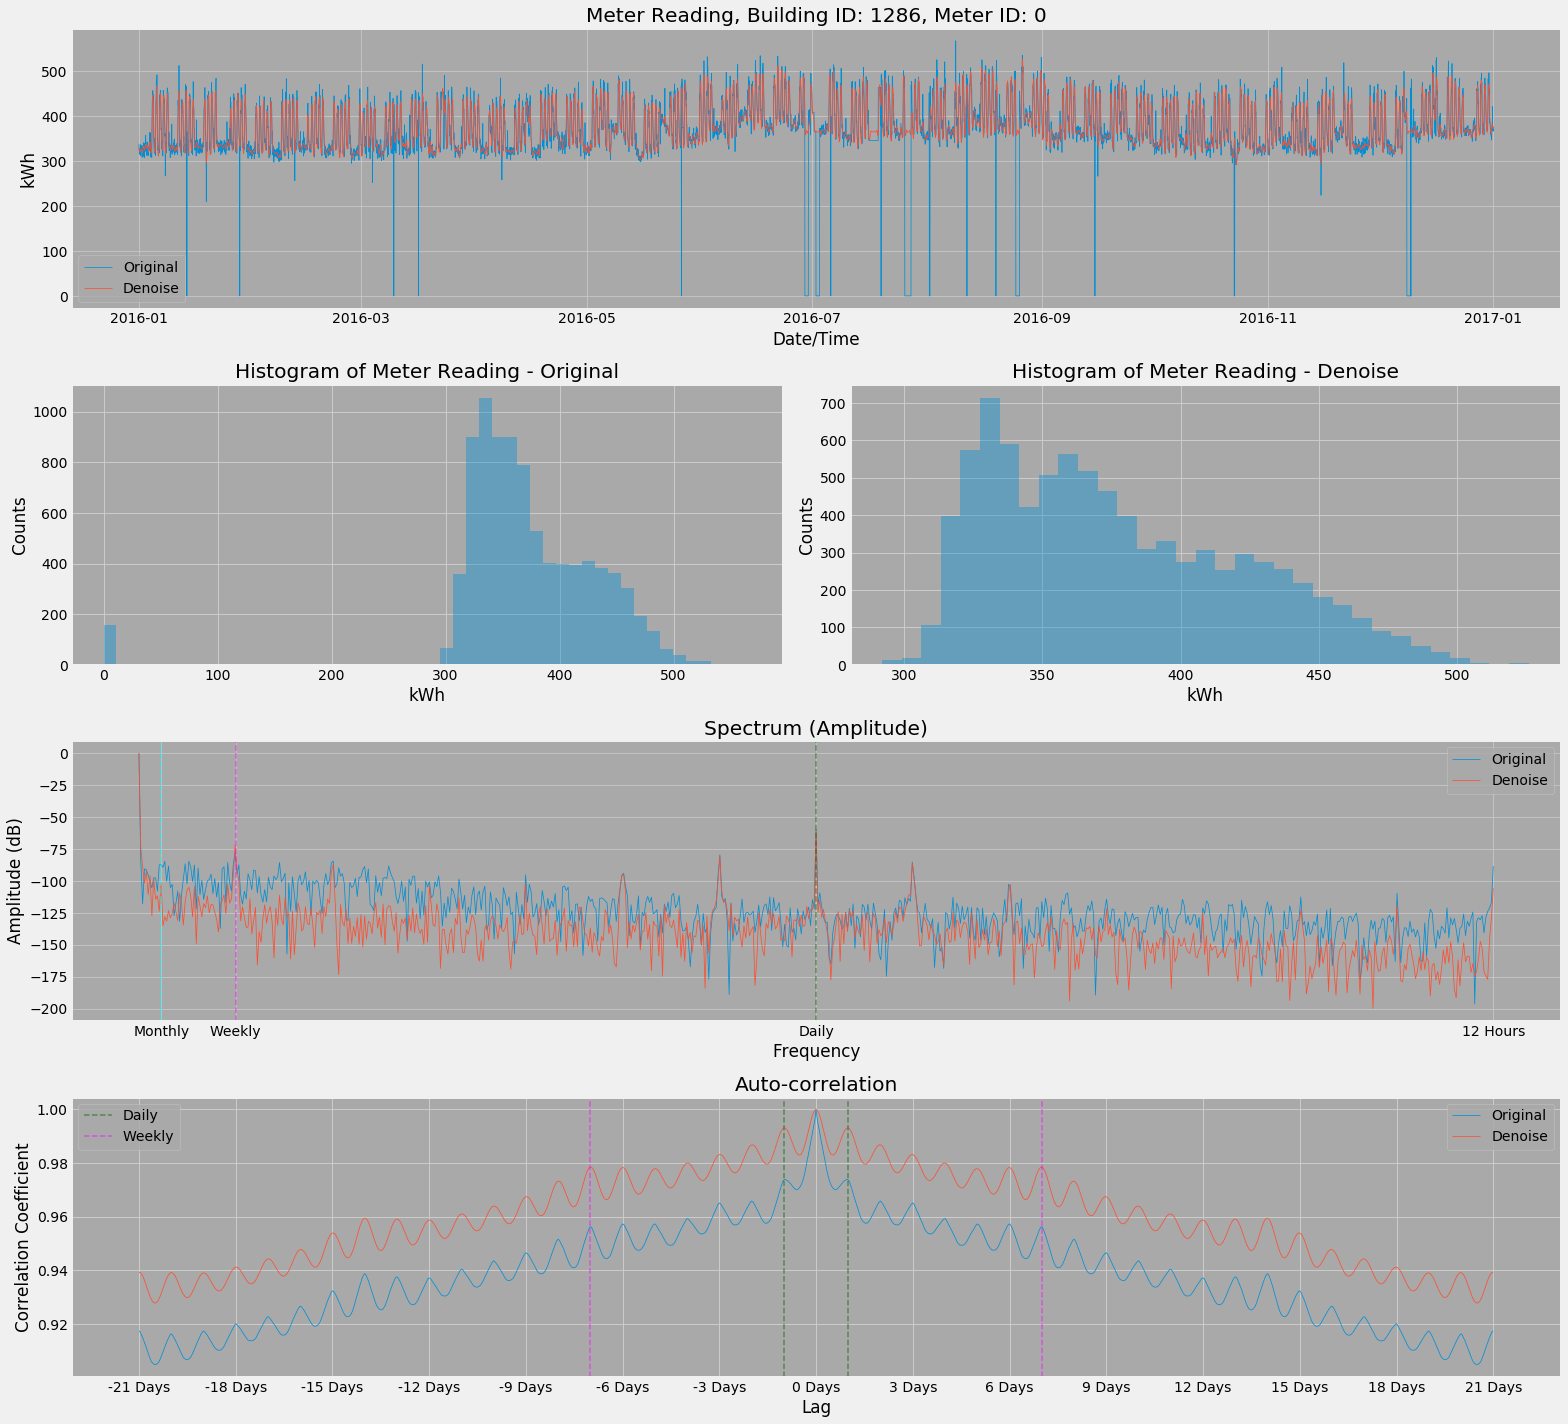

/opt/miniconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in less
  import sys


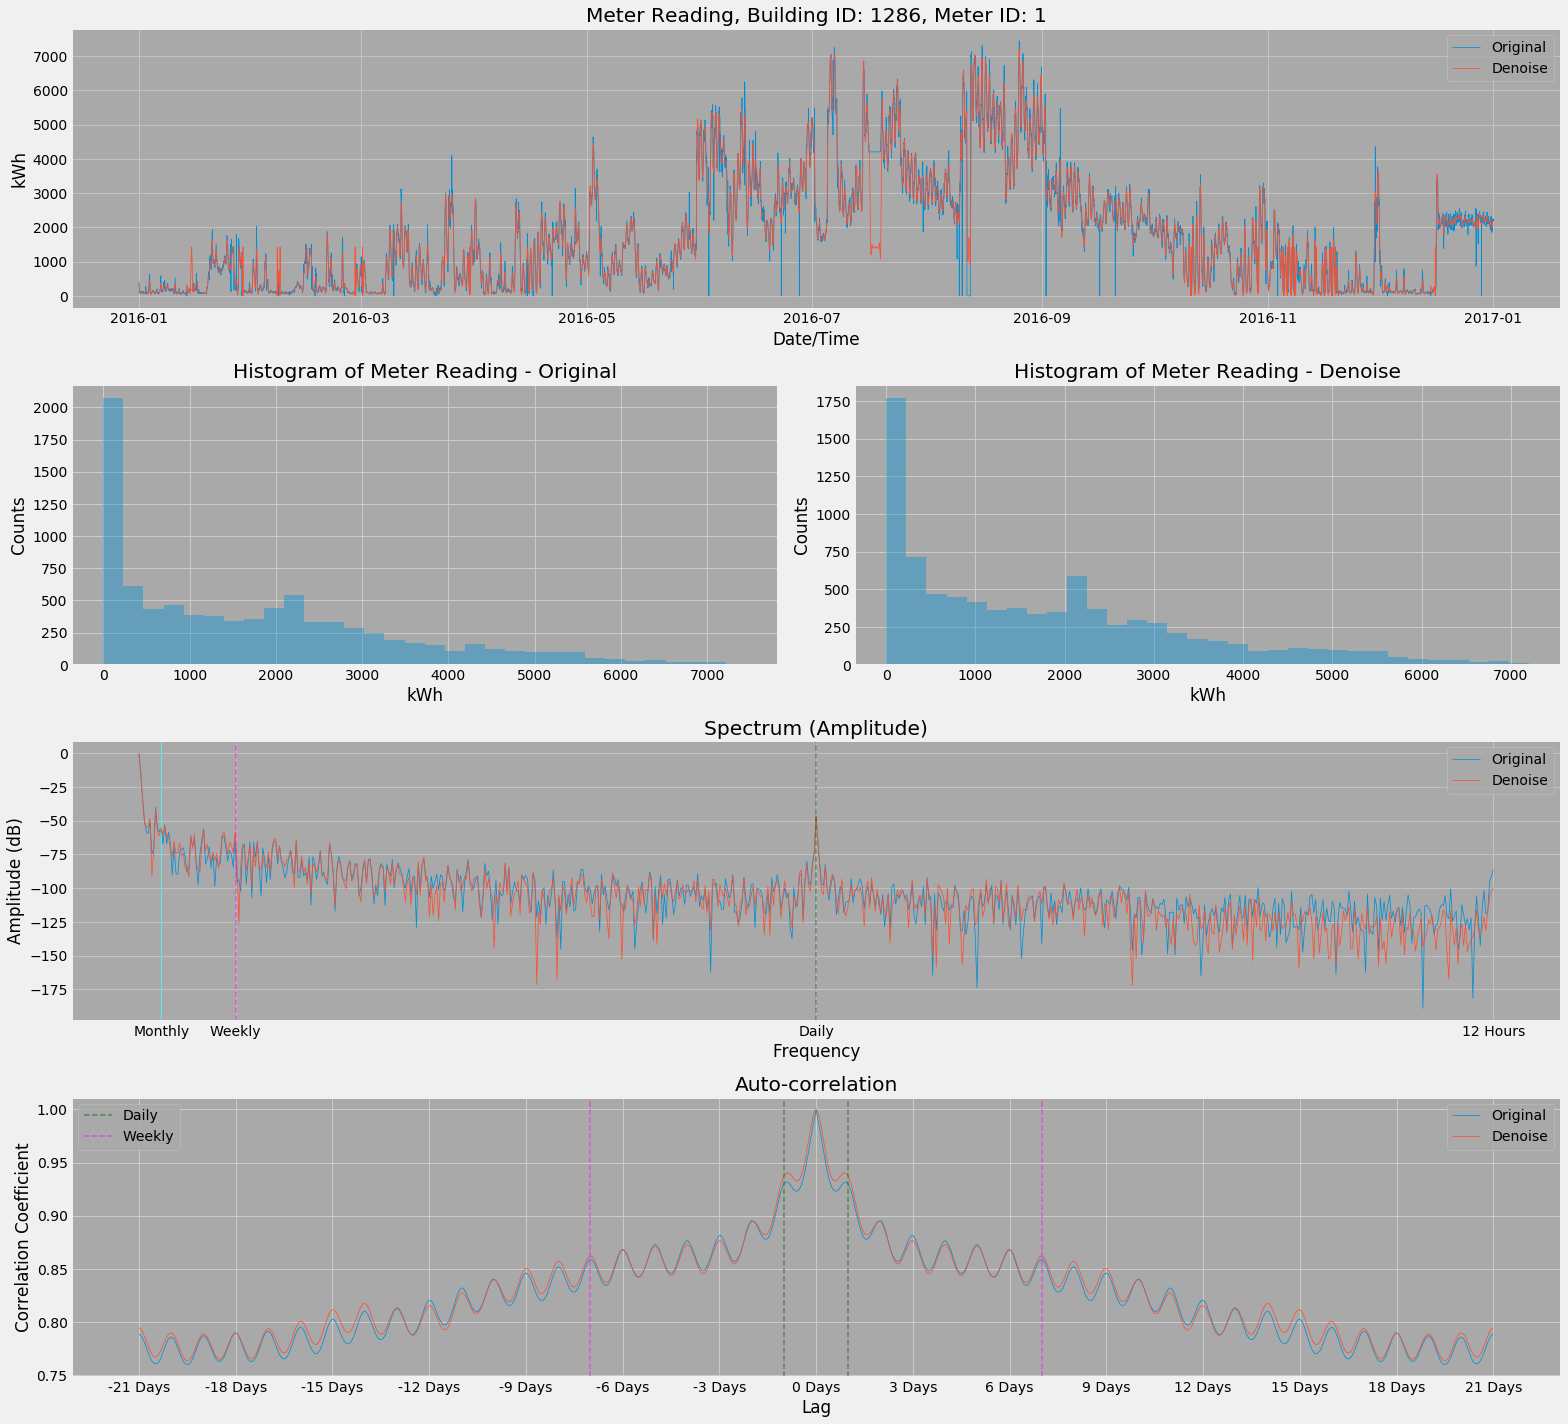

/opt/miniconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in less
  import sys


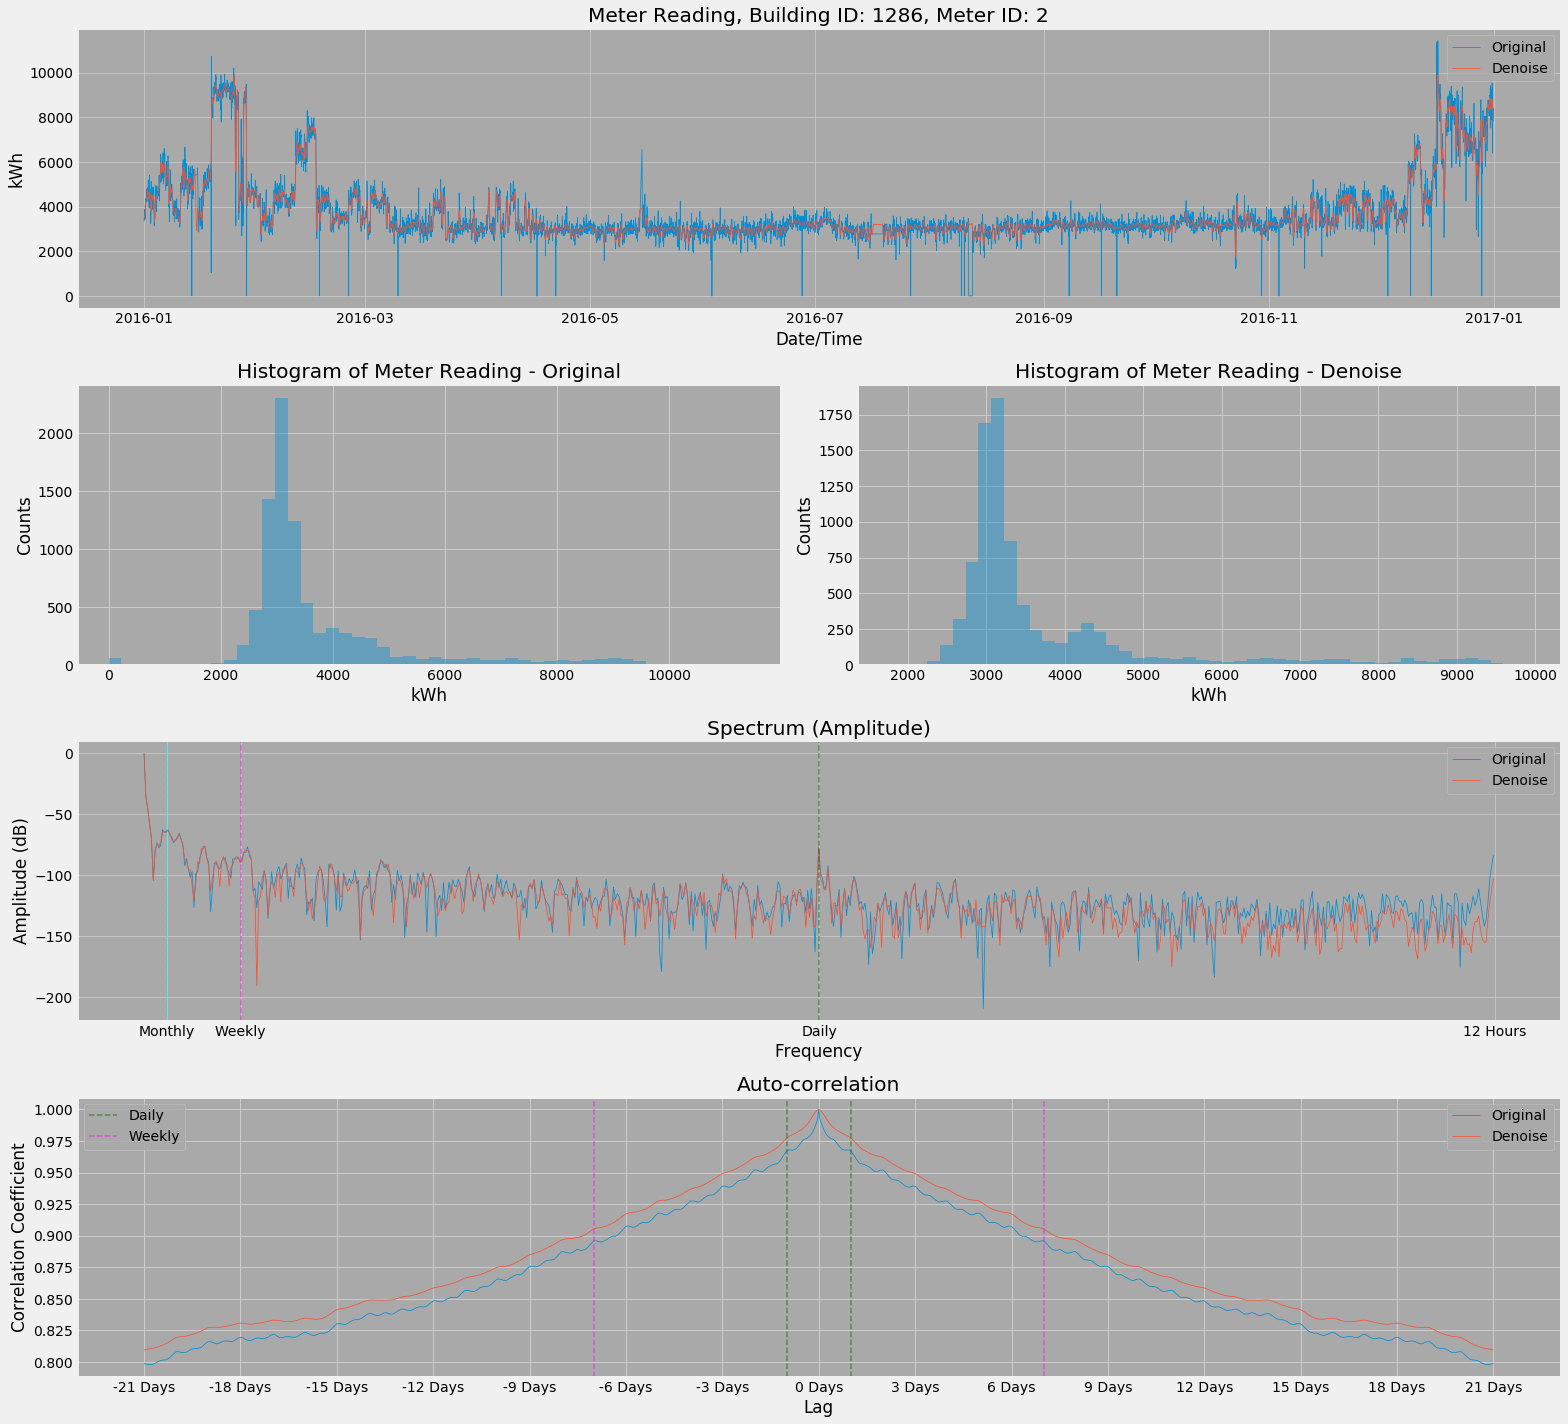

/opt/miniconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in less
  import sys


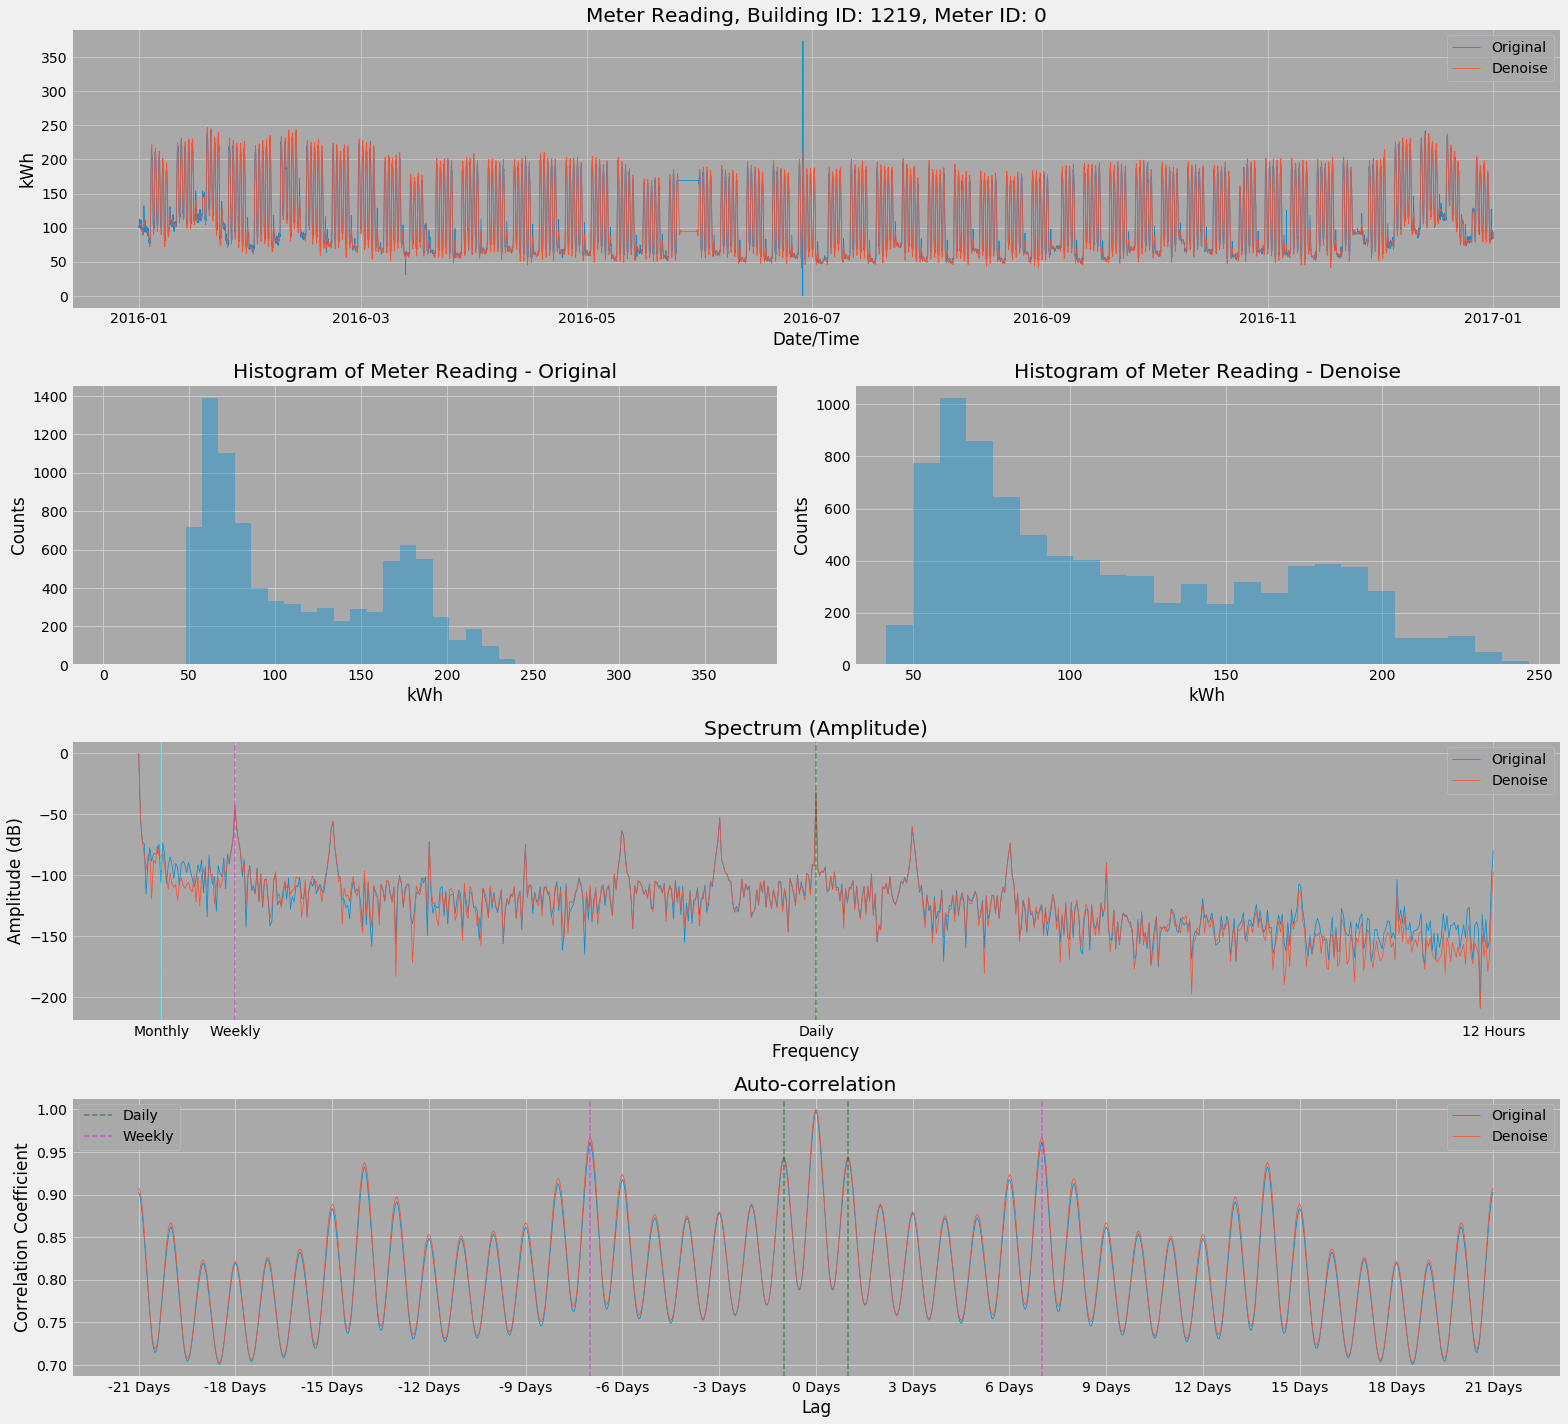

/opt/miniconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in less
  import sys


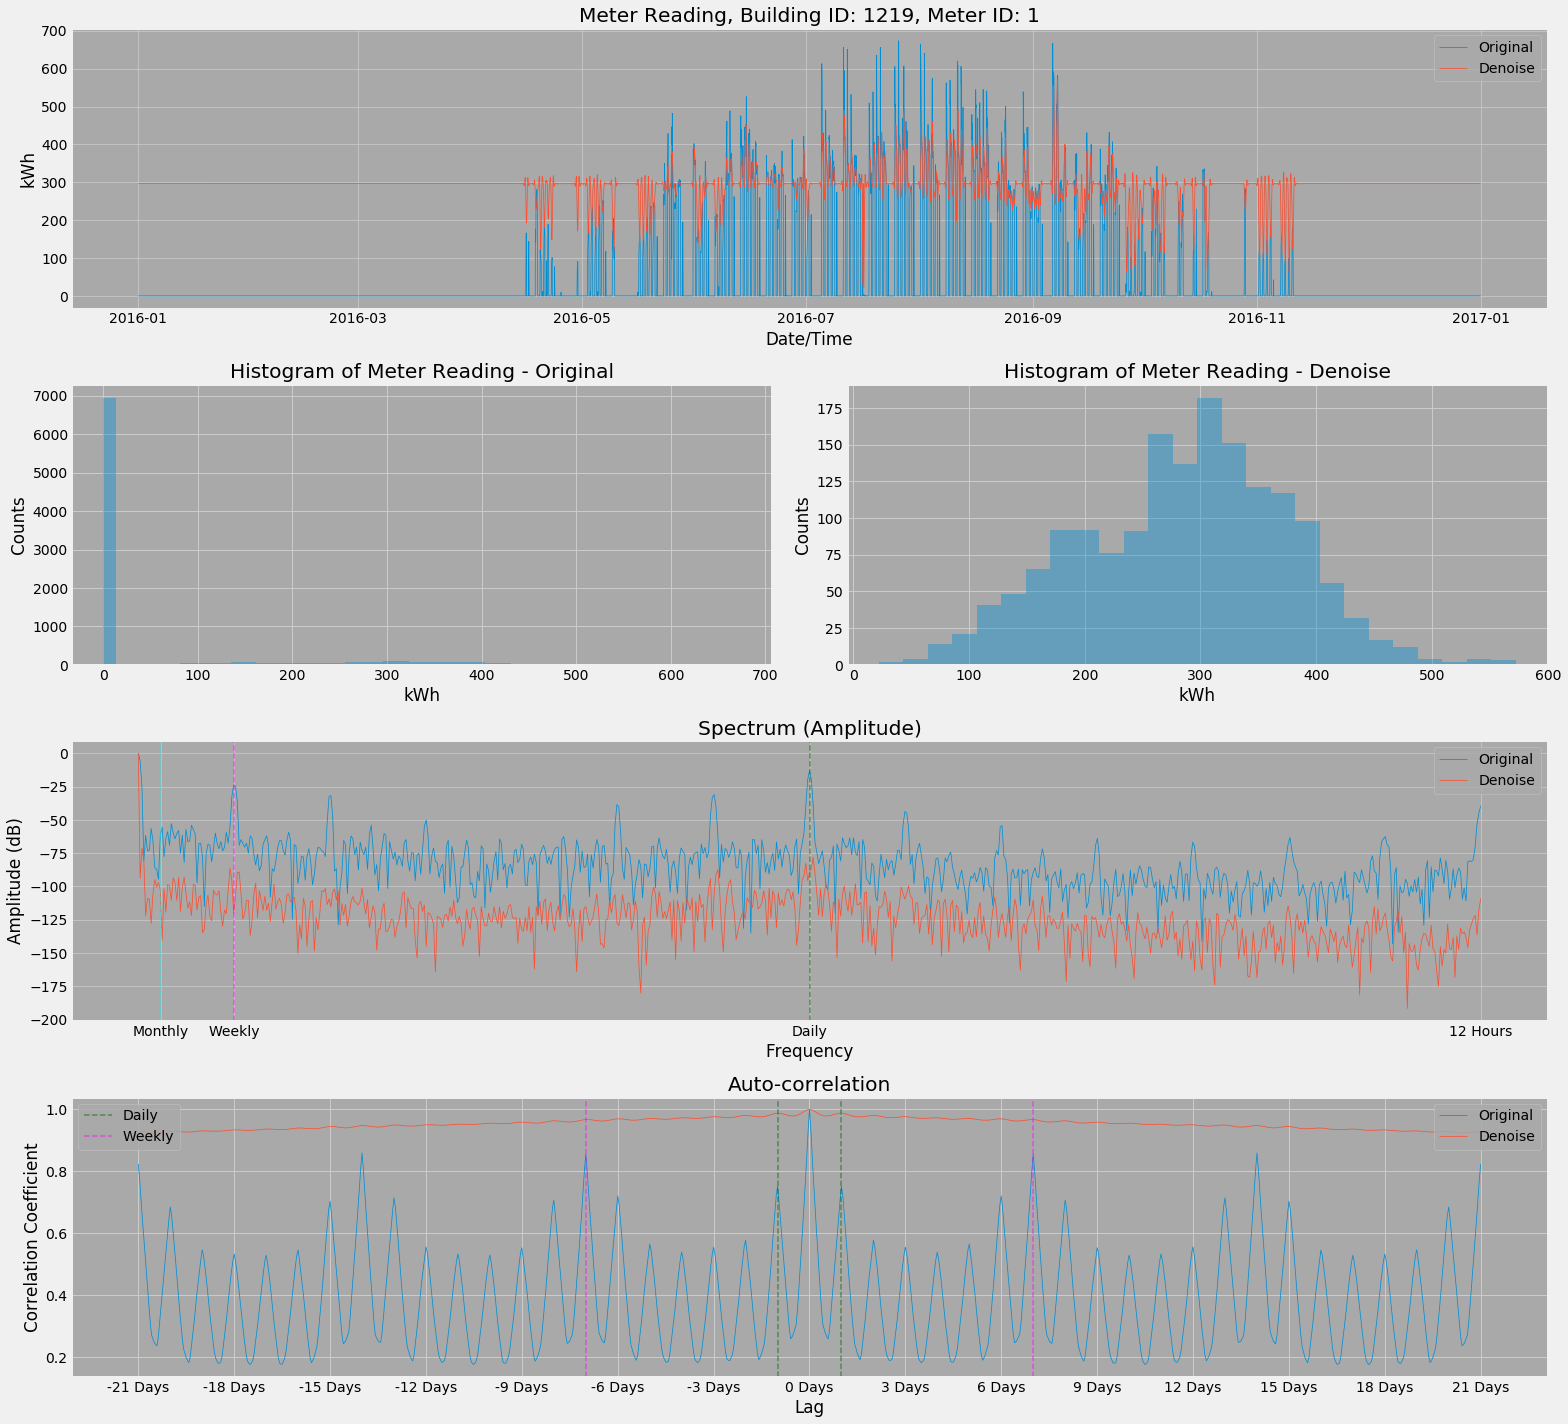

/opt/miniconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in less
  import sys


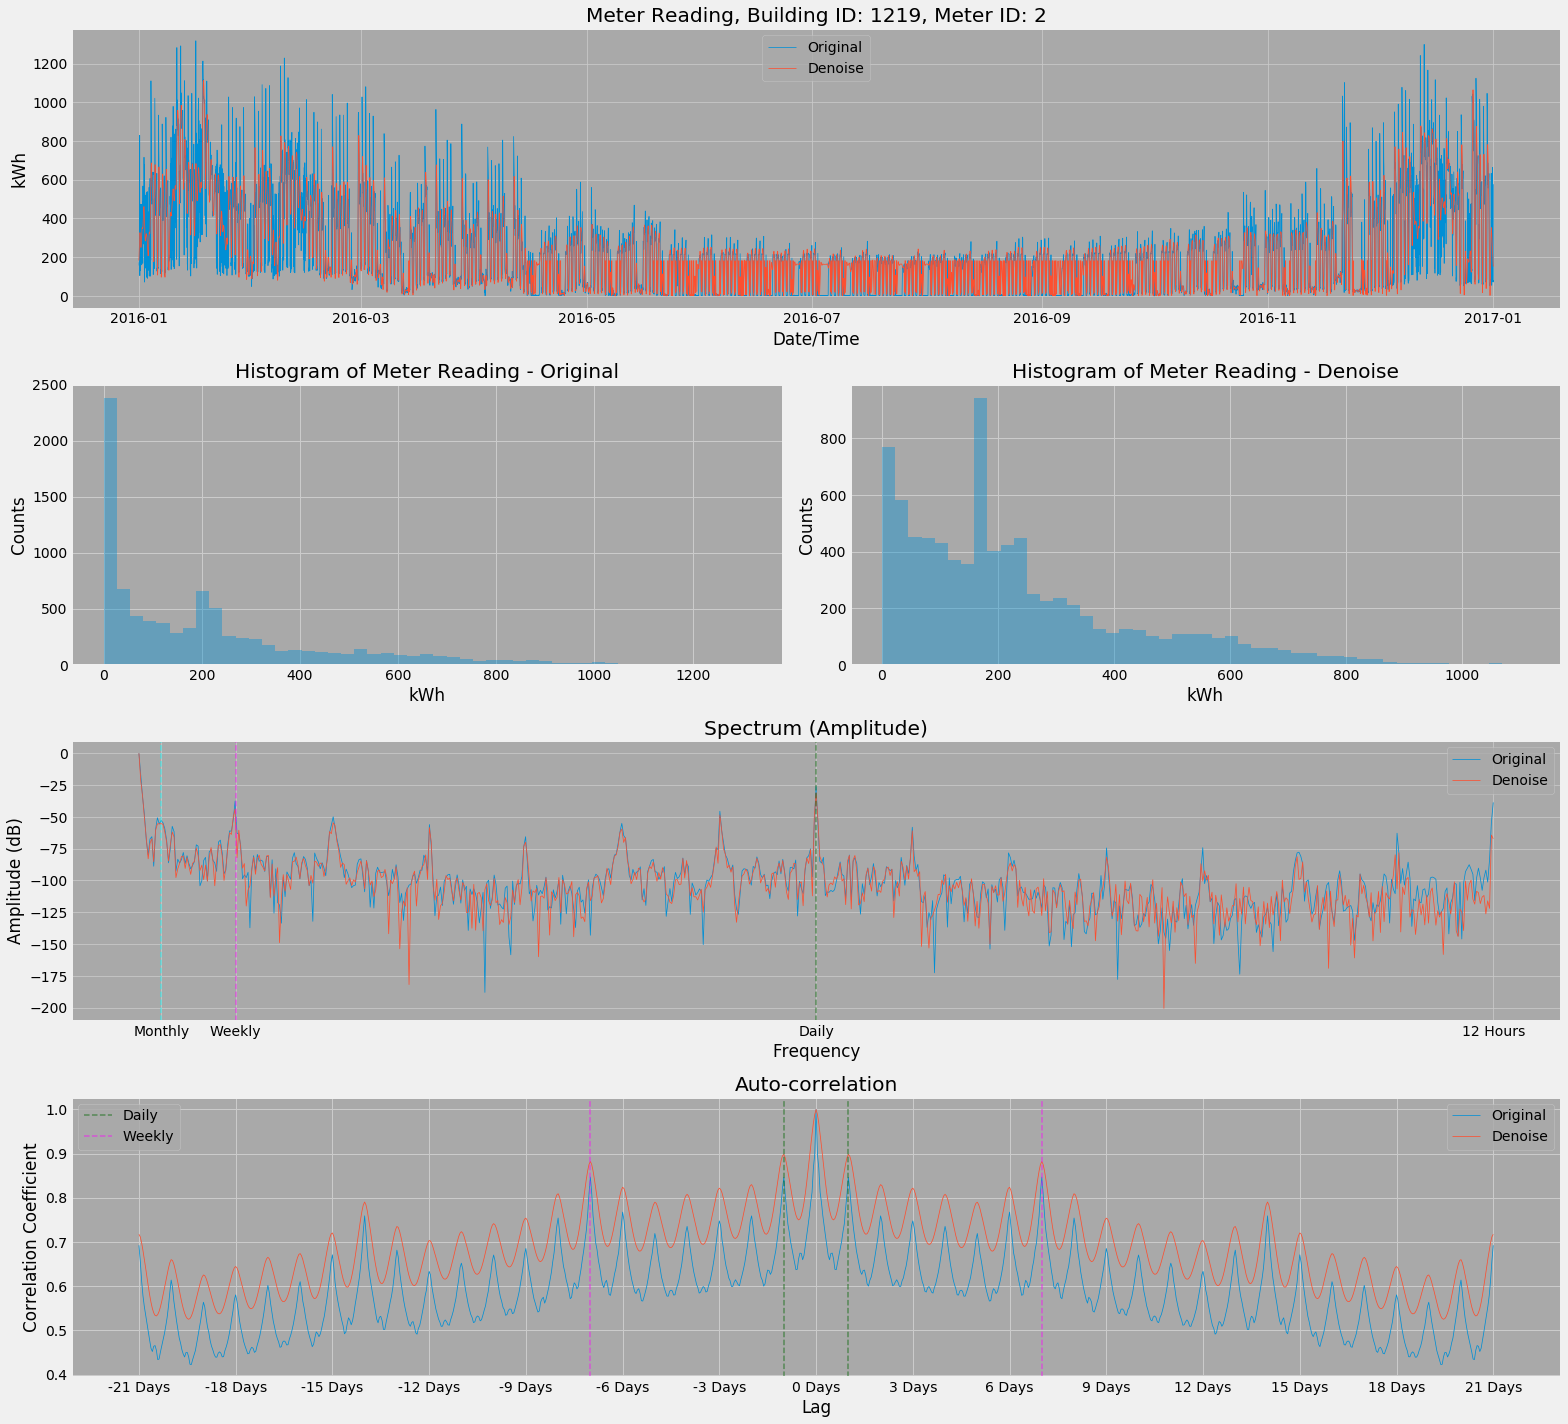

/opt/miniconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in less
  import sys


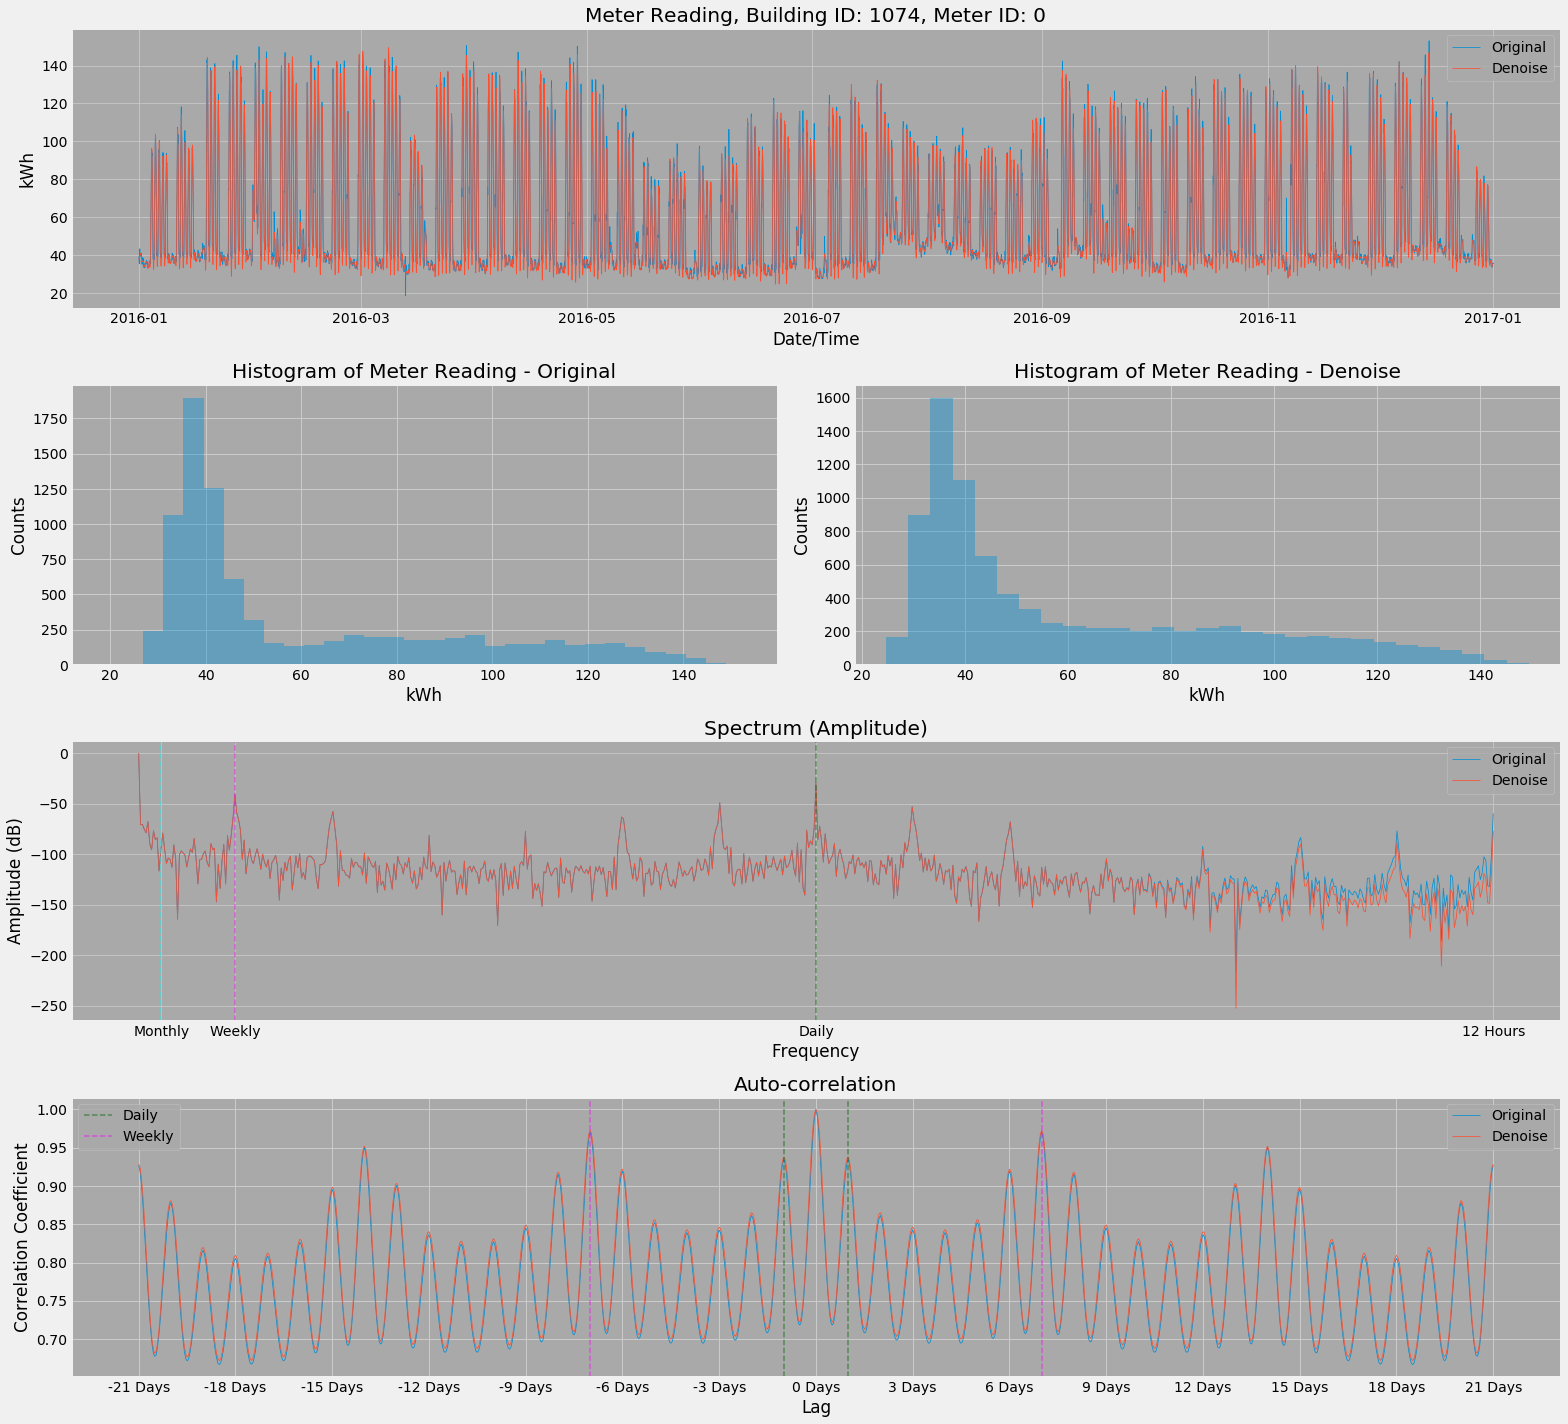

/opt/miniconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in less
  import sys


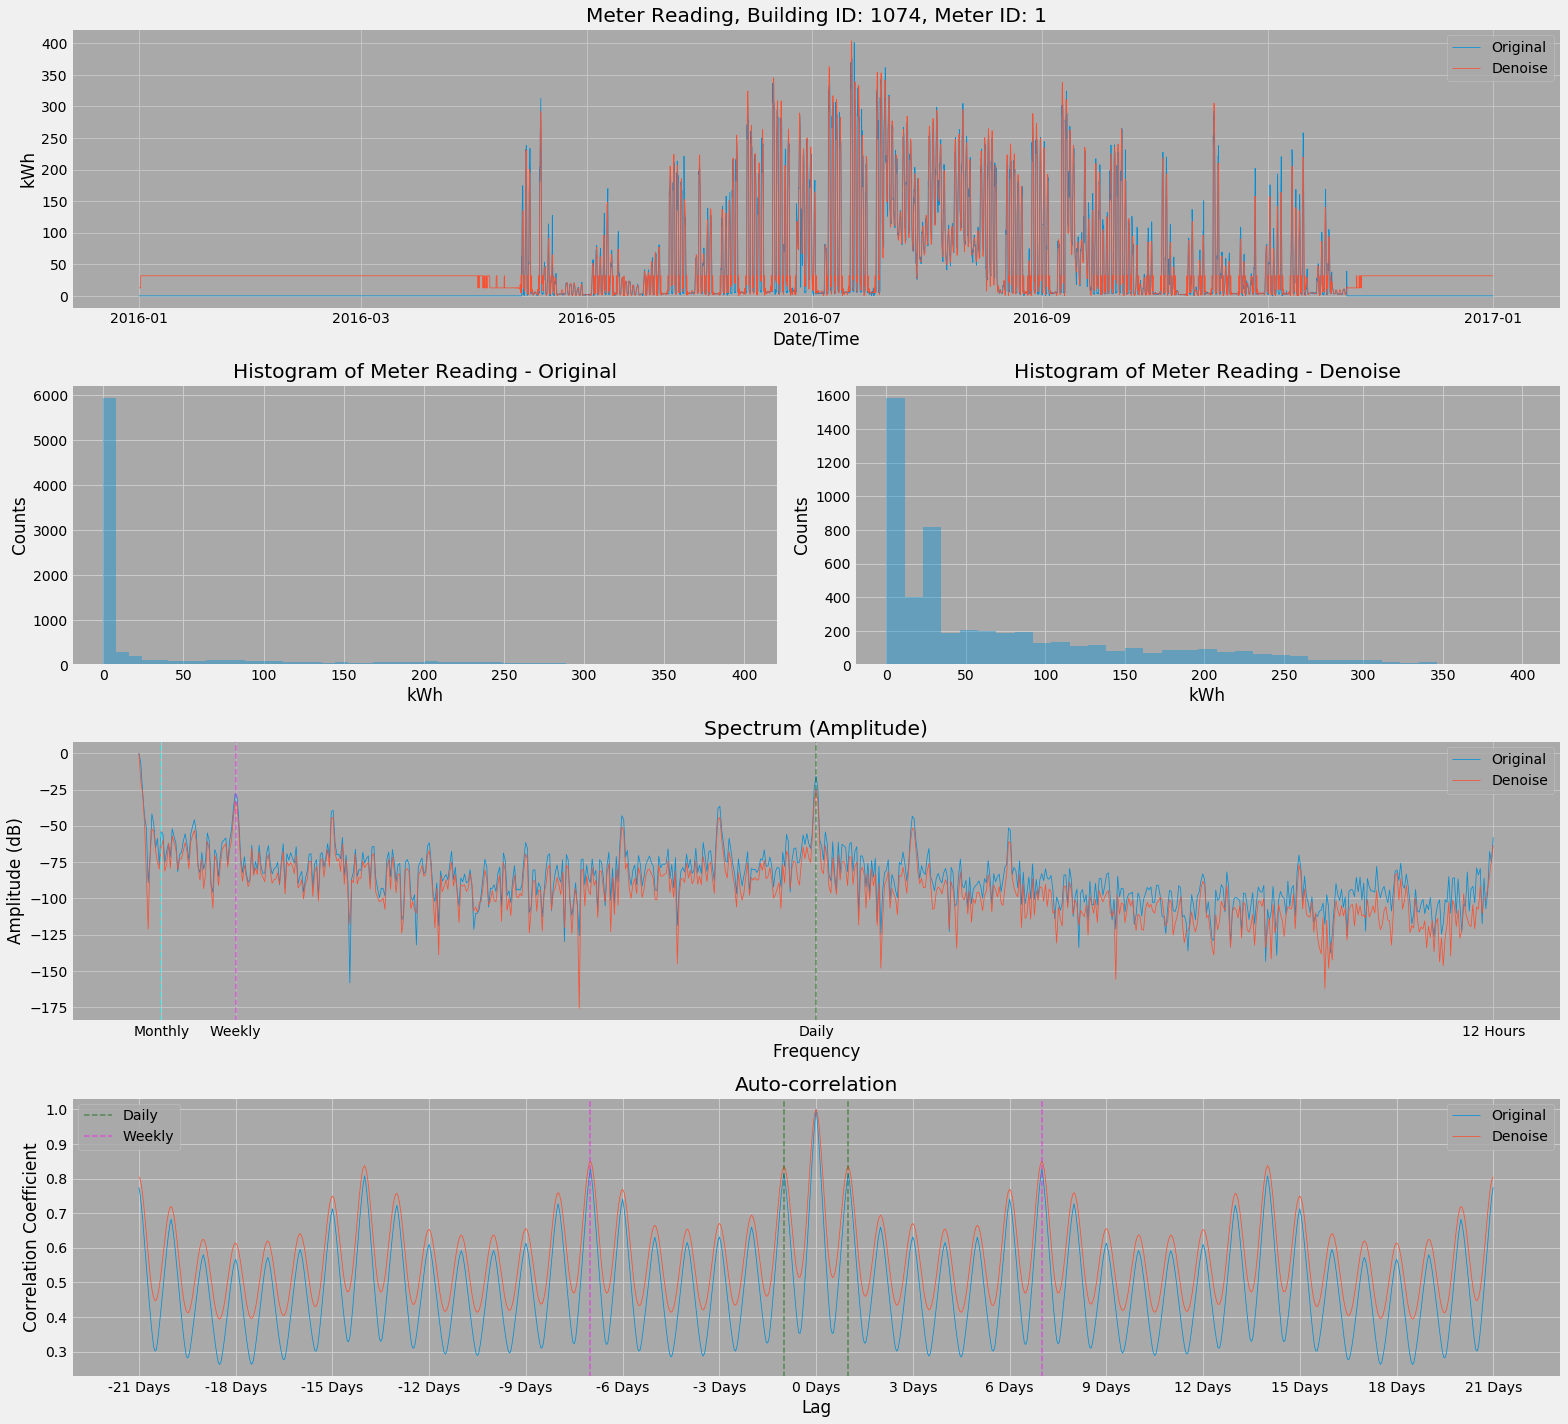

/opt/miniconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in less
  import sys


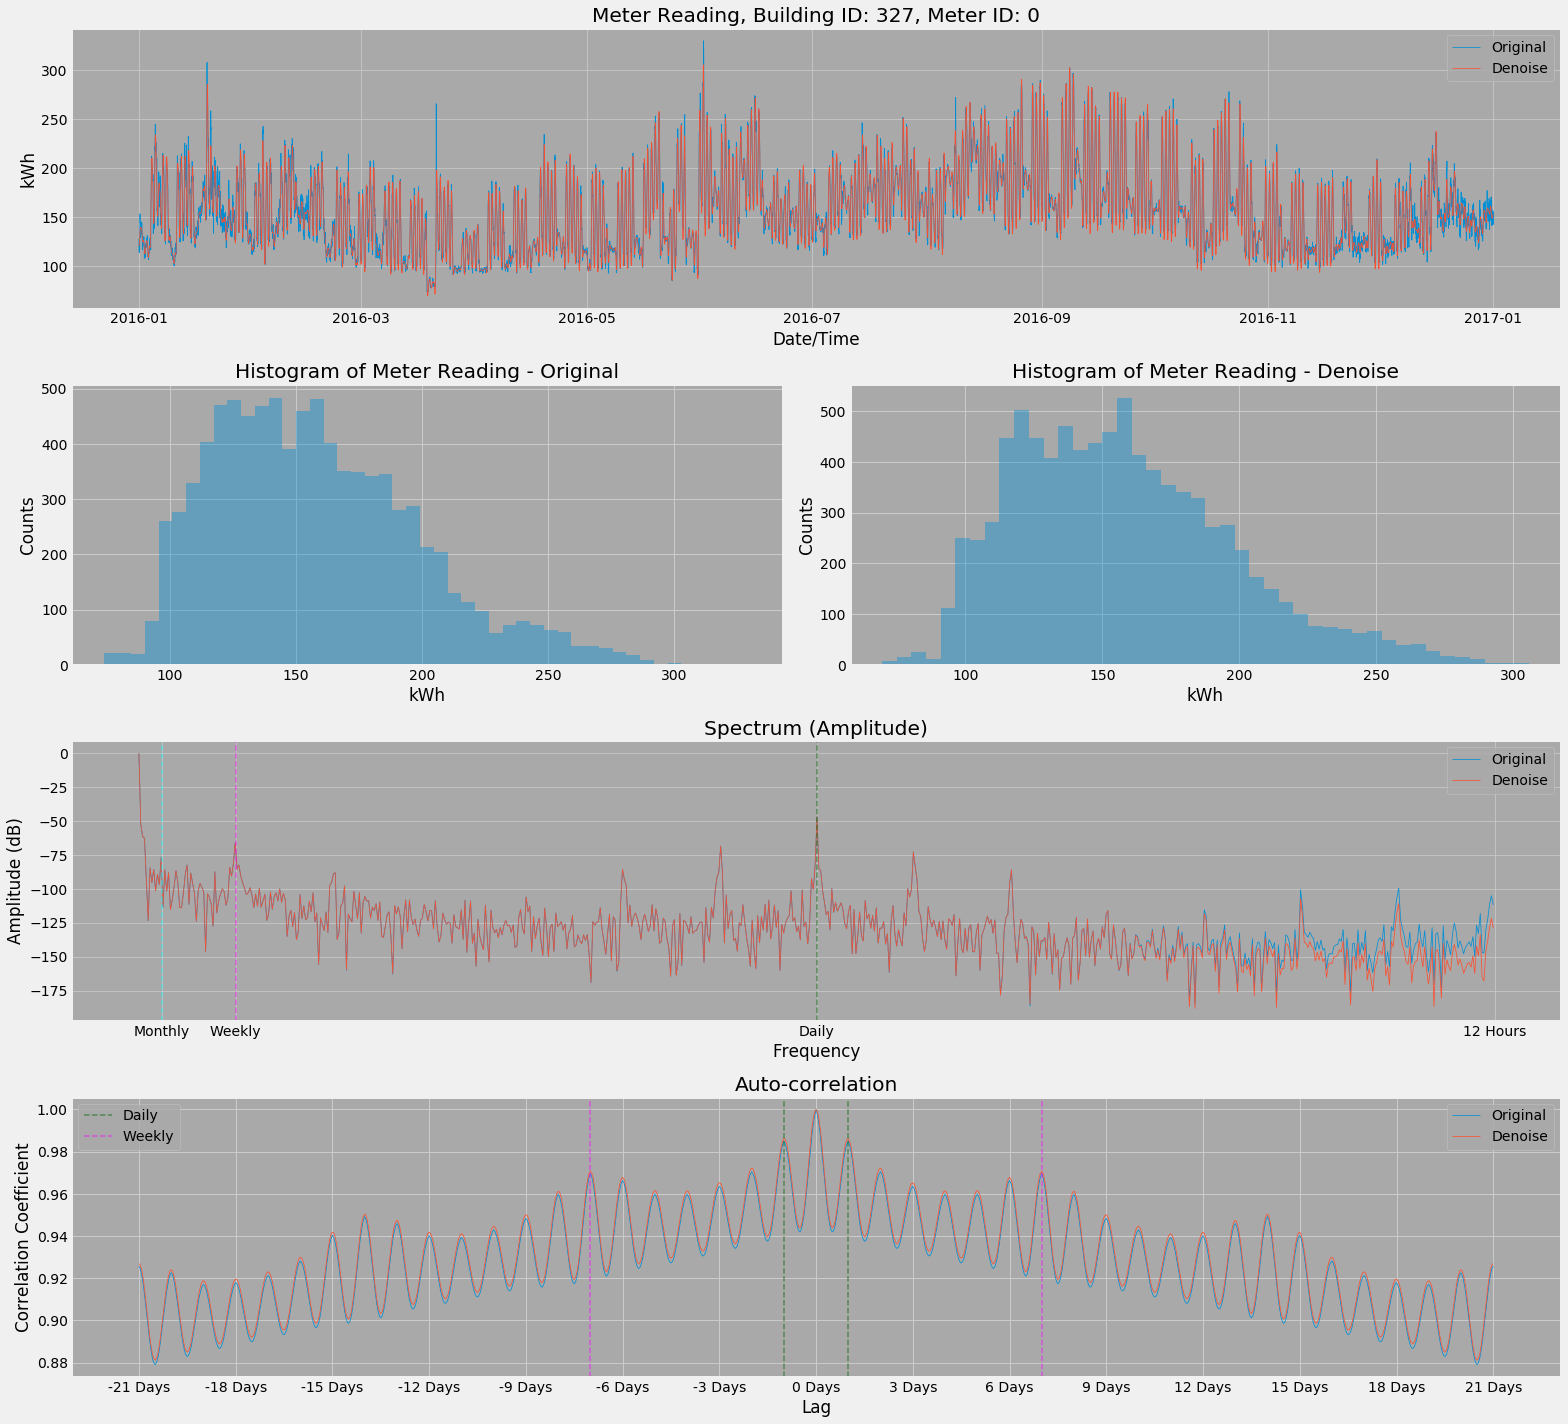

/opt/miniconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in less
  import sys


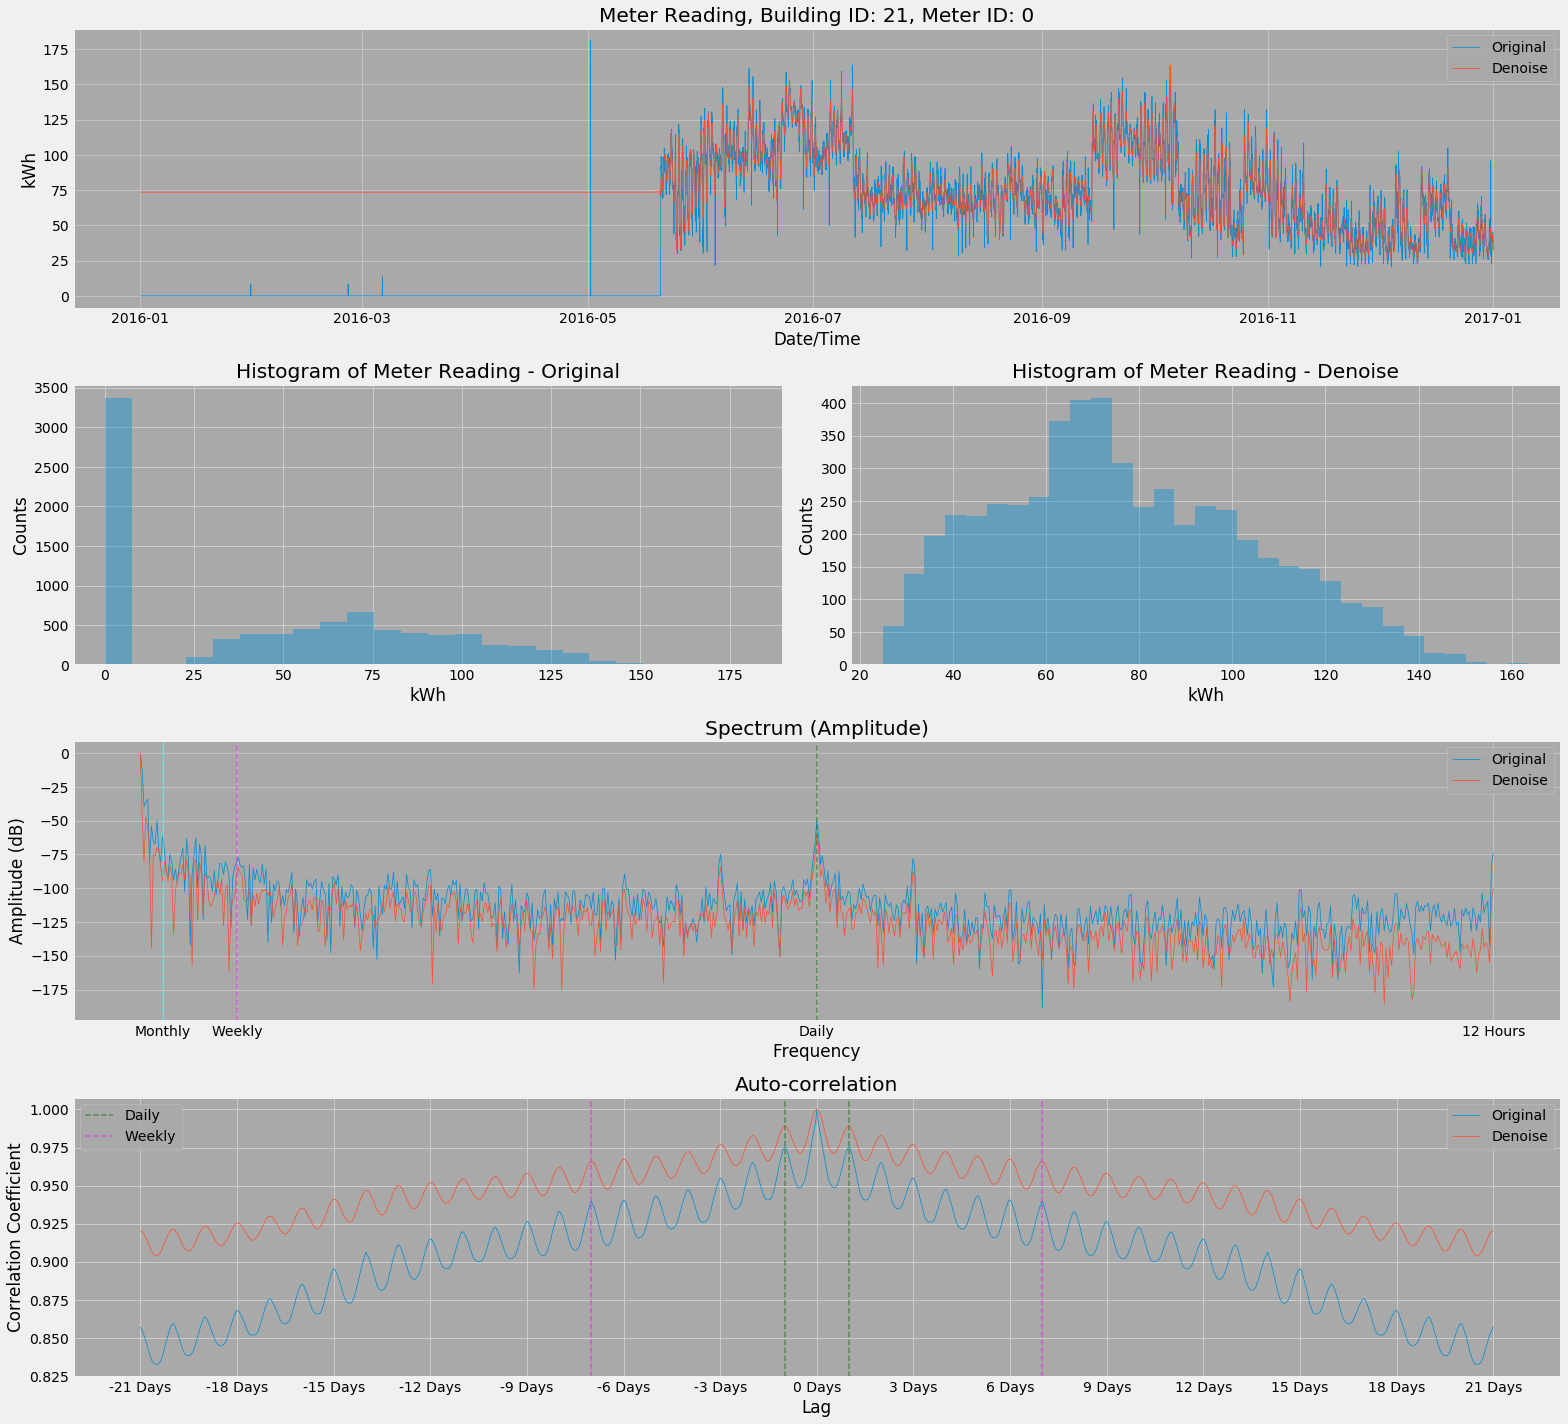

/opt/miniconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in less
  import sys


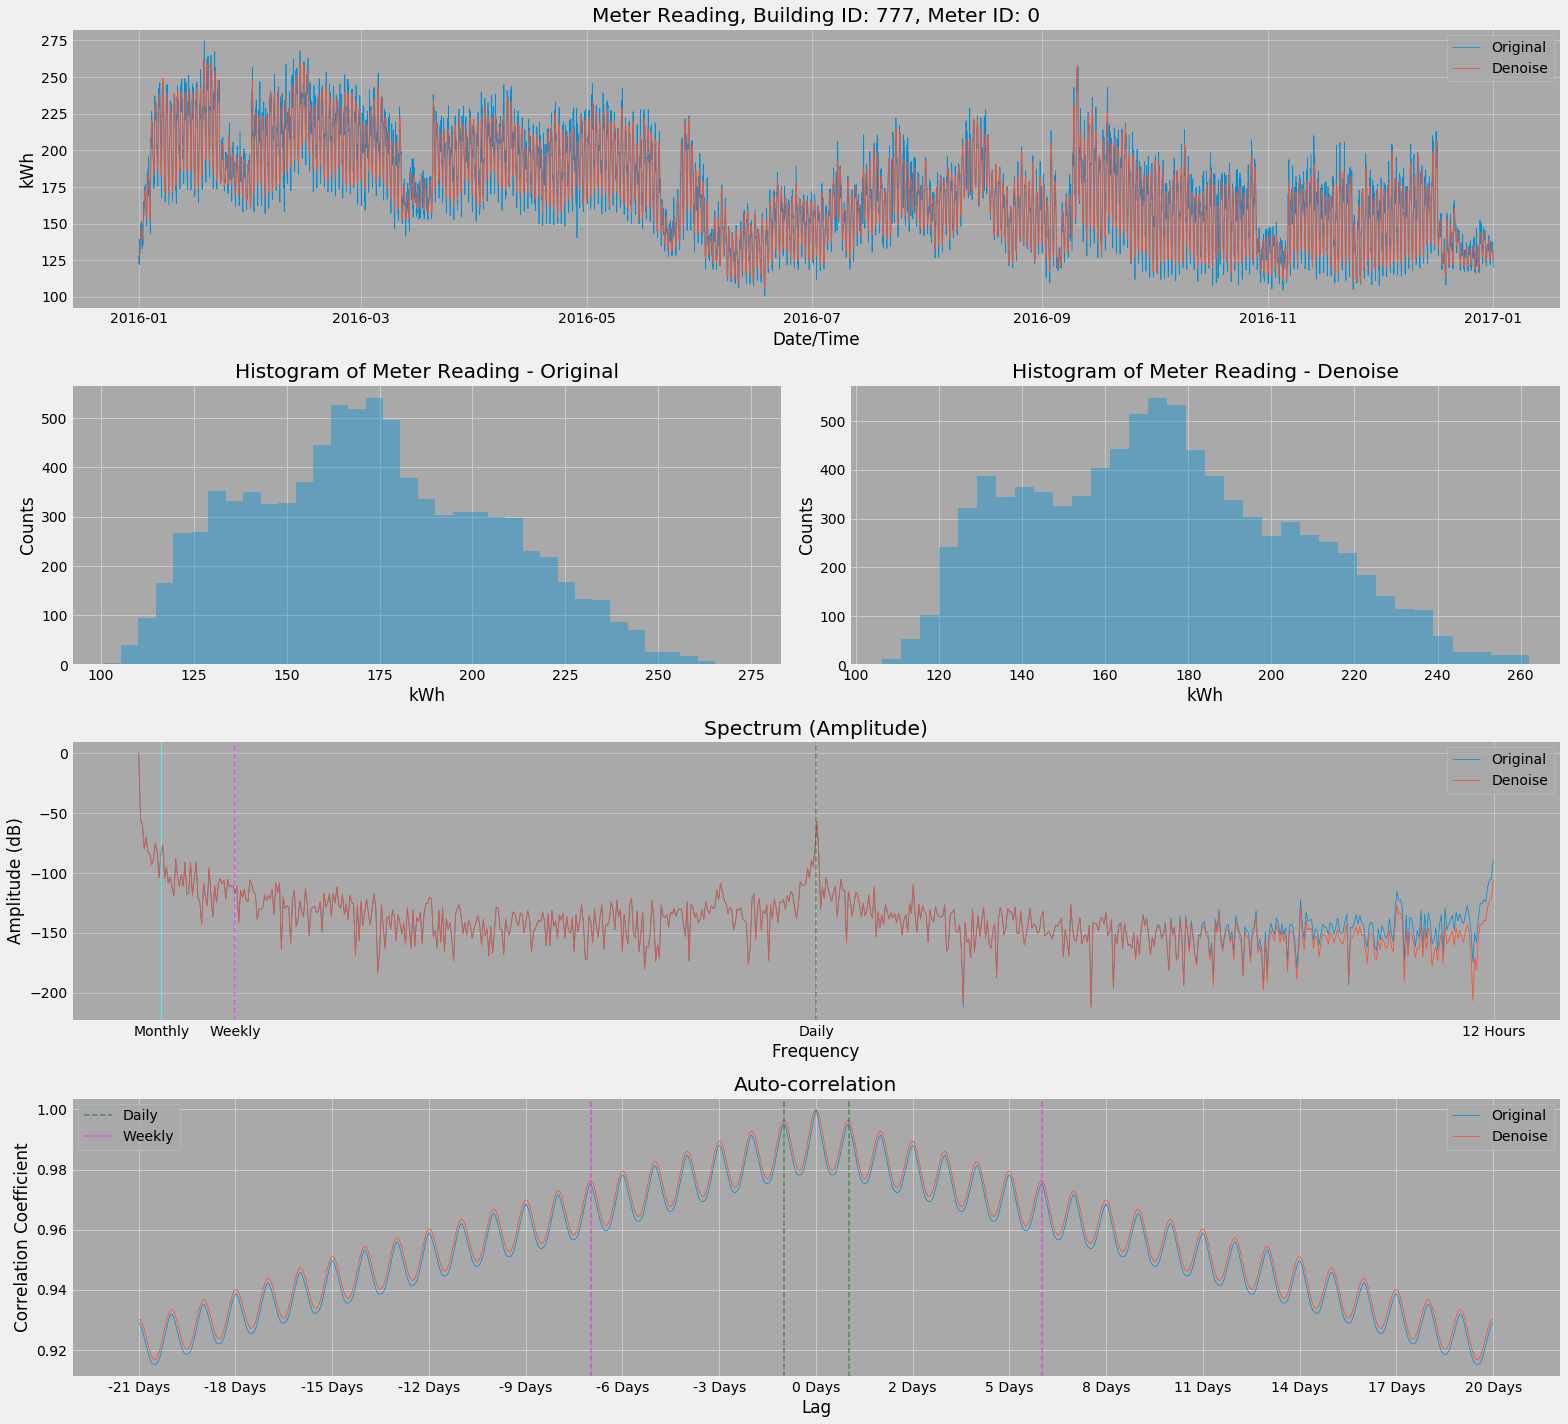

/opt/miniconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in less
  import sys


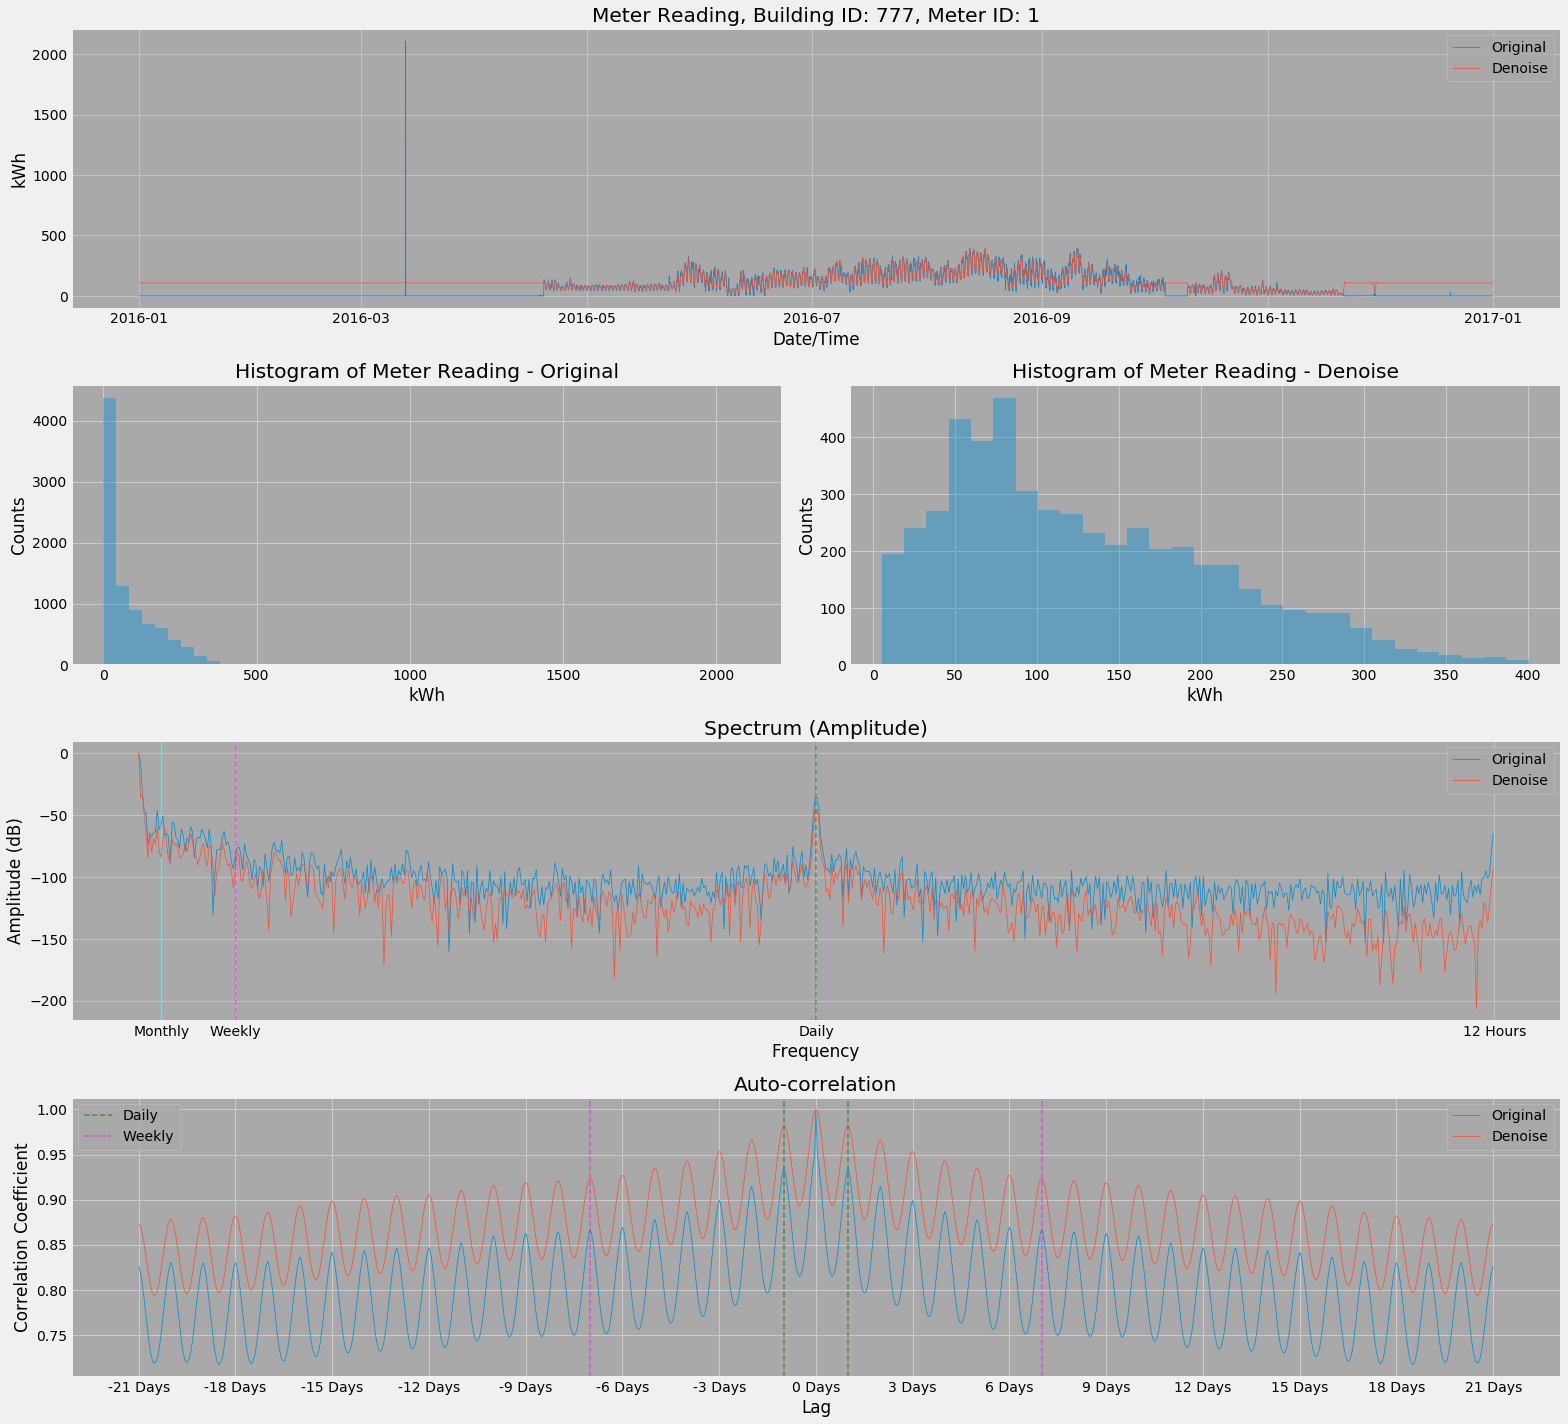

/opt/miniconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in less
  import sys


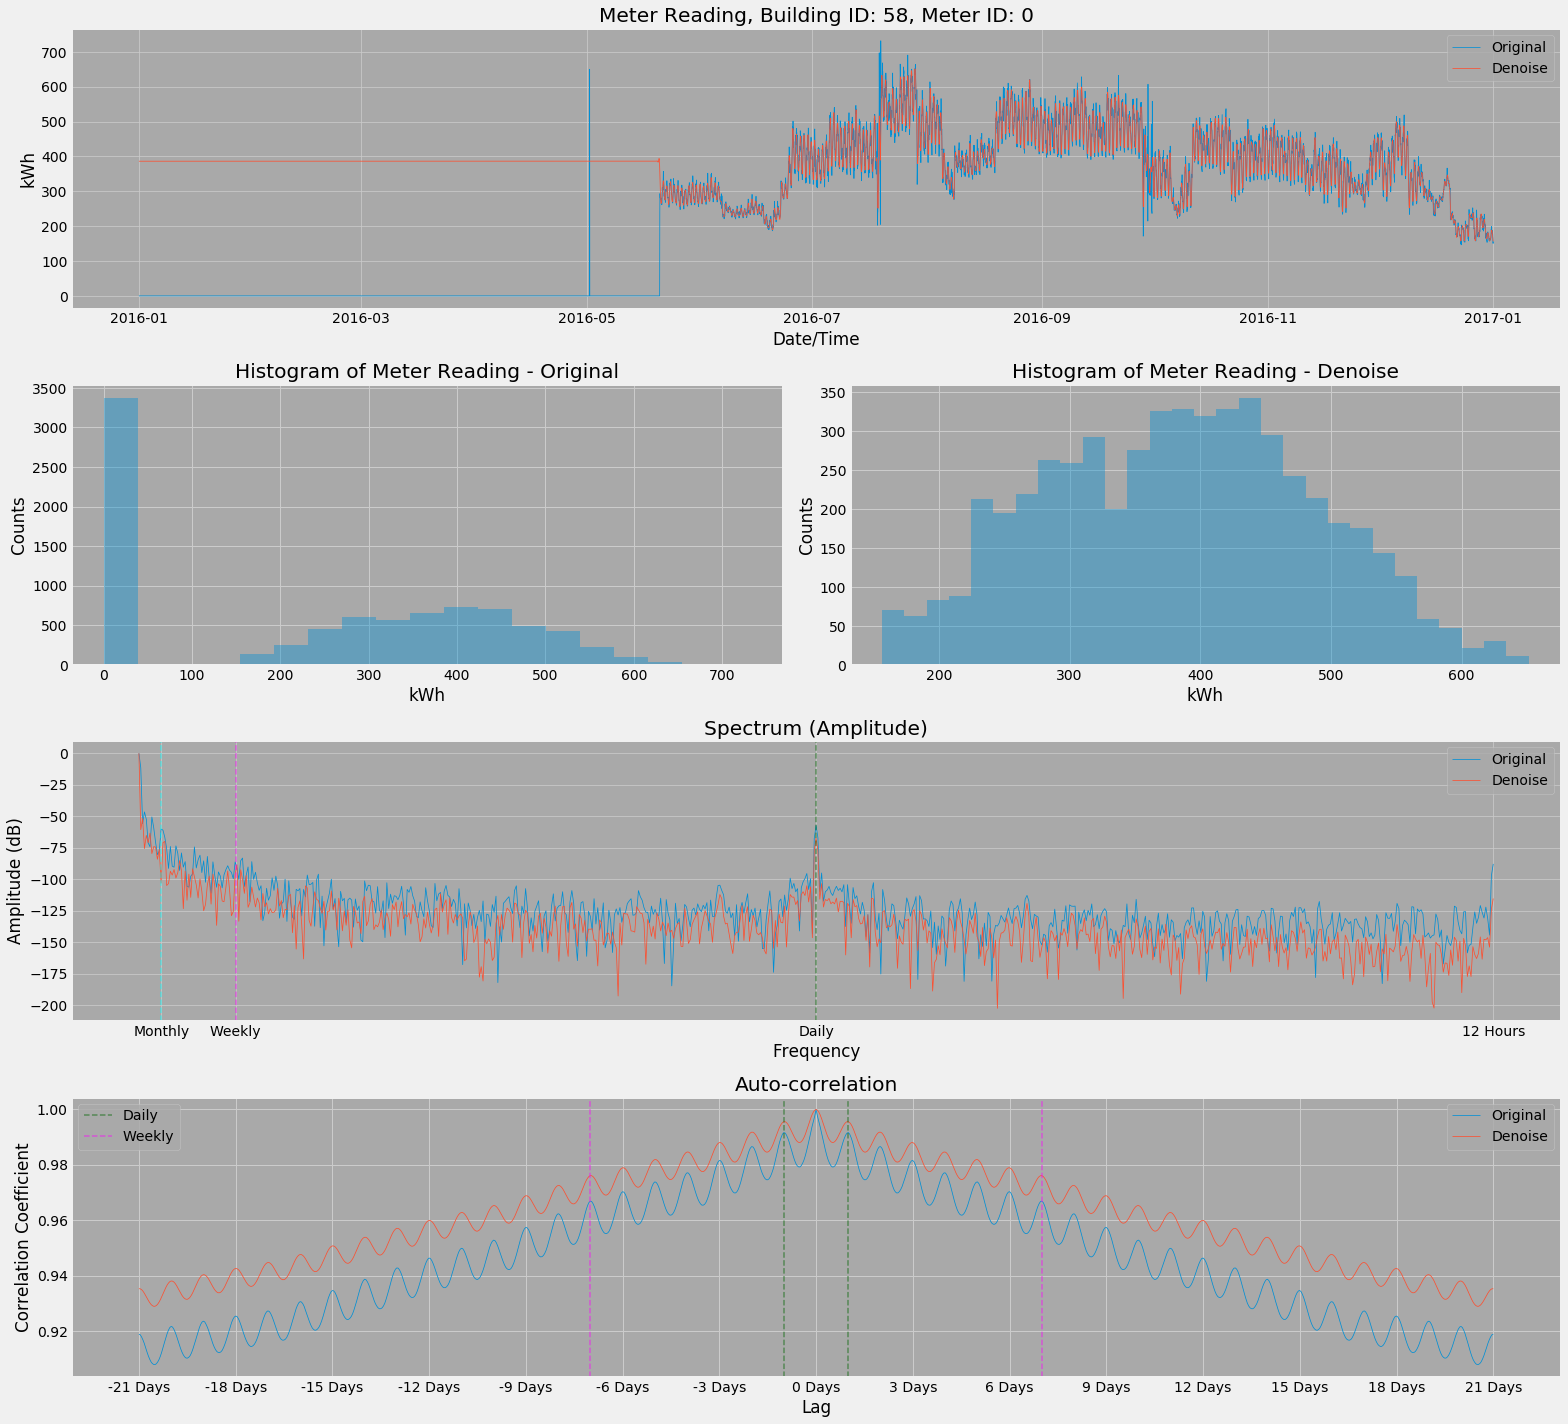

/opt/miniconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in less
  import sys


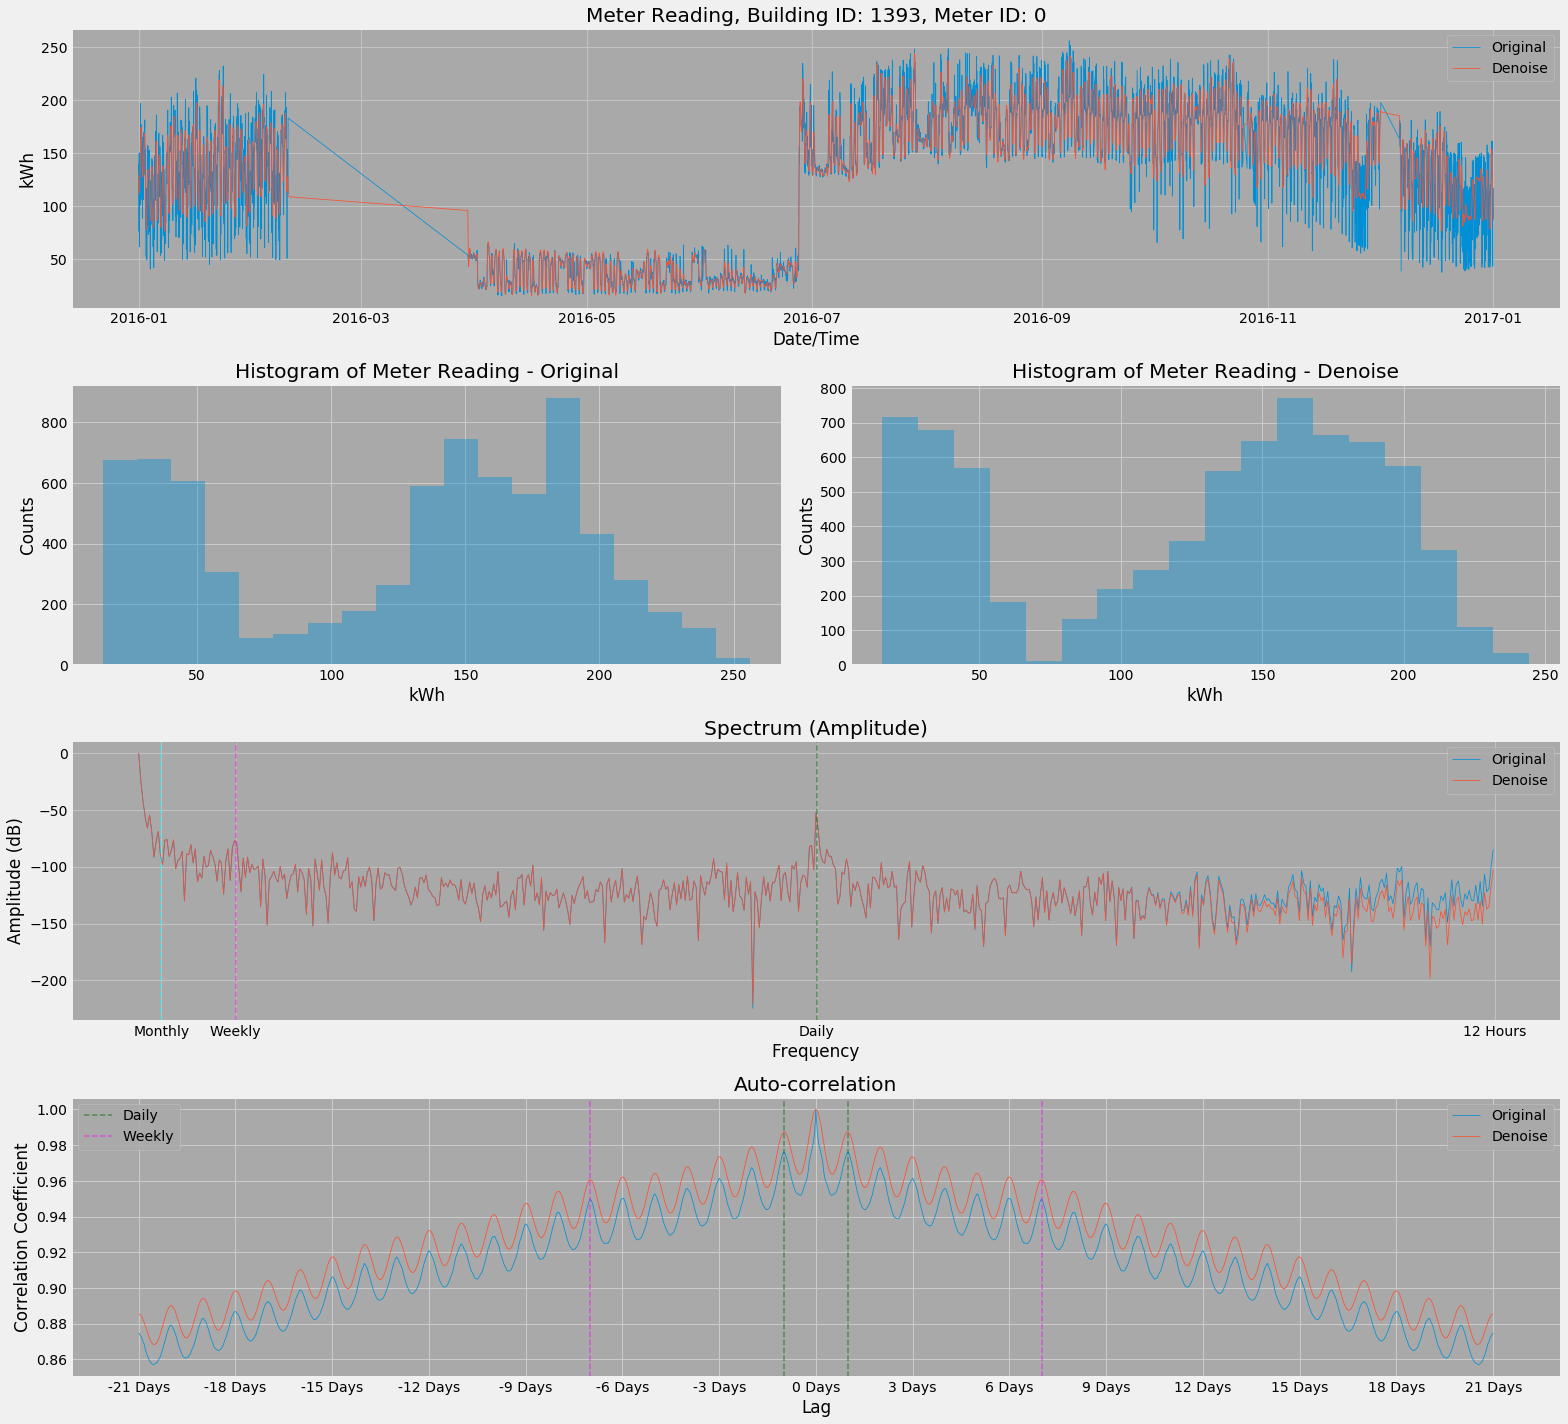

In [7]:
bids = np.random.choice(df_train.building_id.unique(), size = 10, replace = False)

for bid in bids:
    for mid in df_train[df_train.building_id == bid].meter.unique():
        with plt.style.context('fivethirtyeight'):
            mpl.rcParams['axes.facecolor'] = 'darkgrey' 
            plot_meter(df_train, bid, mid, FIGSIZE, True)